In [147]:
import pandas as pd 
import numpy as np

data = pd.read_csv('train.csv')
data


,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,14:03,第34節,第1日,川崎Ｆ,大宮,等々力陸上競技場,晴,11.7,40,DAZN/NHK BS1,25904
3668,19377,2017-12-02,14:03,第34節,第1日,甲府,仙台,山梨中銀スタジアム,晴,18.3,34,DAZN,14680
3669,19378,2017-12-02,14:04,第34節,第1日,新潟,Ｃ大阪,デンカビッグスワンスタジアム,晴,6.7,60,DAZN,19684
3670,19379,2017-12-02,14:03,第34節,第1日,磐田,鹿島,ヤマハスタジアム(磐田),晴,17.7,30,DAZN/NHK総合,14696


In [148]:
# 将 match_date 和 kick_off_time 列结合成一个新的 datetime 列
data['match_datetime'] = pd.to_datetime(data['match_date'] + ' ' + data['kick_off_time'])

# drop
data.drop(['match_date', 'kick_off_time'], axis=1, inplace=True)

data

,id,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,match_datetime
0,9190,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00
1,9191,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00
2,9192,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00
3,9193,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00
4,9194,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,第34節,第1日,川崎Ｆ,大宮,等々力陸上競技場,晴,11.7,40,DAZN/NHK BS1,25904,2017-12-02 14:03:00
3668,19377,第34節,第1日,甲府,仙台,山梨中銀スタジアム,晴,18.3,34,DAZN,14680,2017-12-02 14:03:00
3669,19378,第34節,第1日,新潟,Ｃ大阪,デンカビッグスワンスタジアム,晴,6.7,60,DAZN,19684,2017-12-02 14:04:00
3670,19379,第34節,第1日,磐田,鹿島,ヤマハスタジアム(磐田),晴,17.7,30,DAZN/NHK総合,14696,2017-12-02 14:03:00


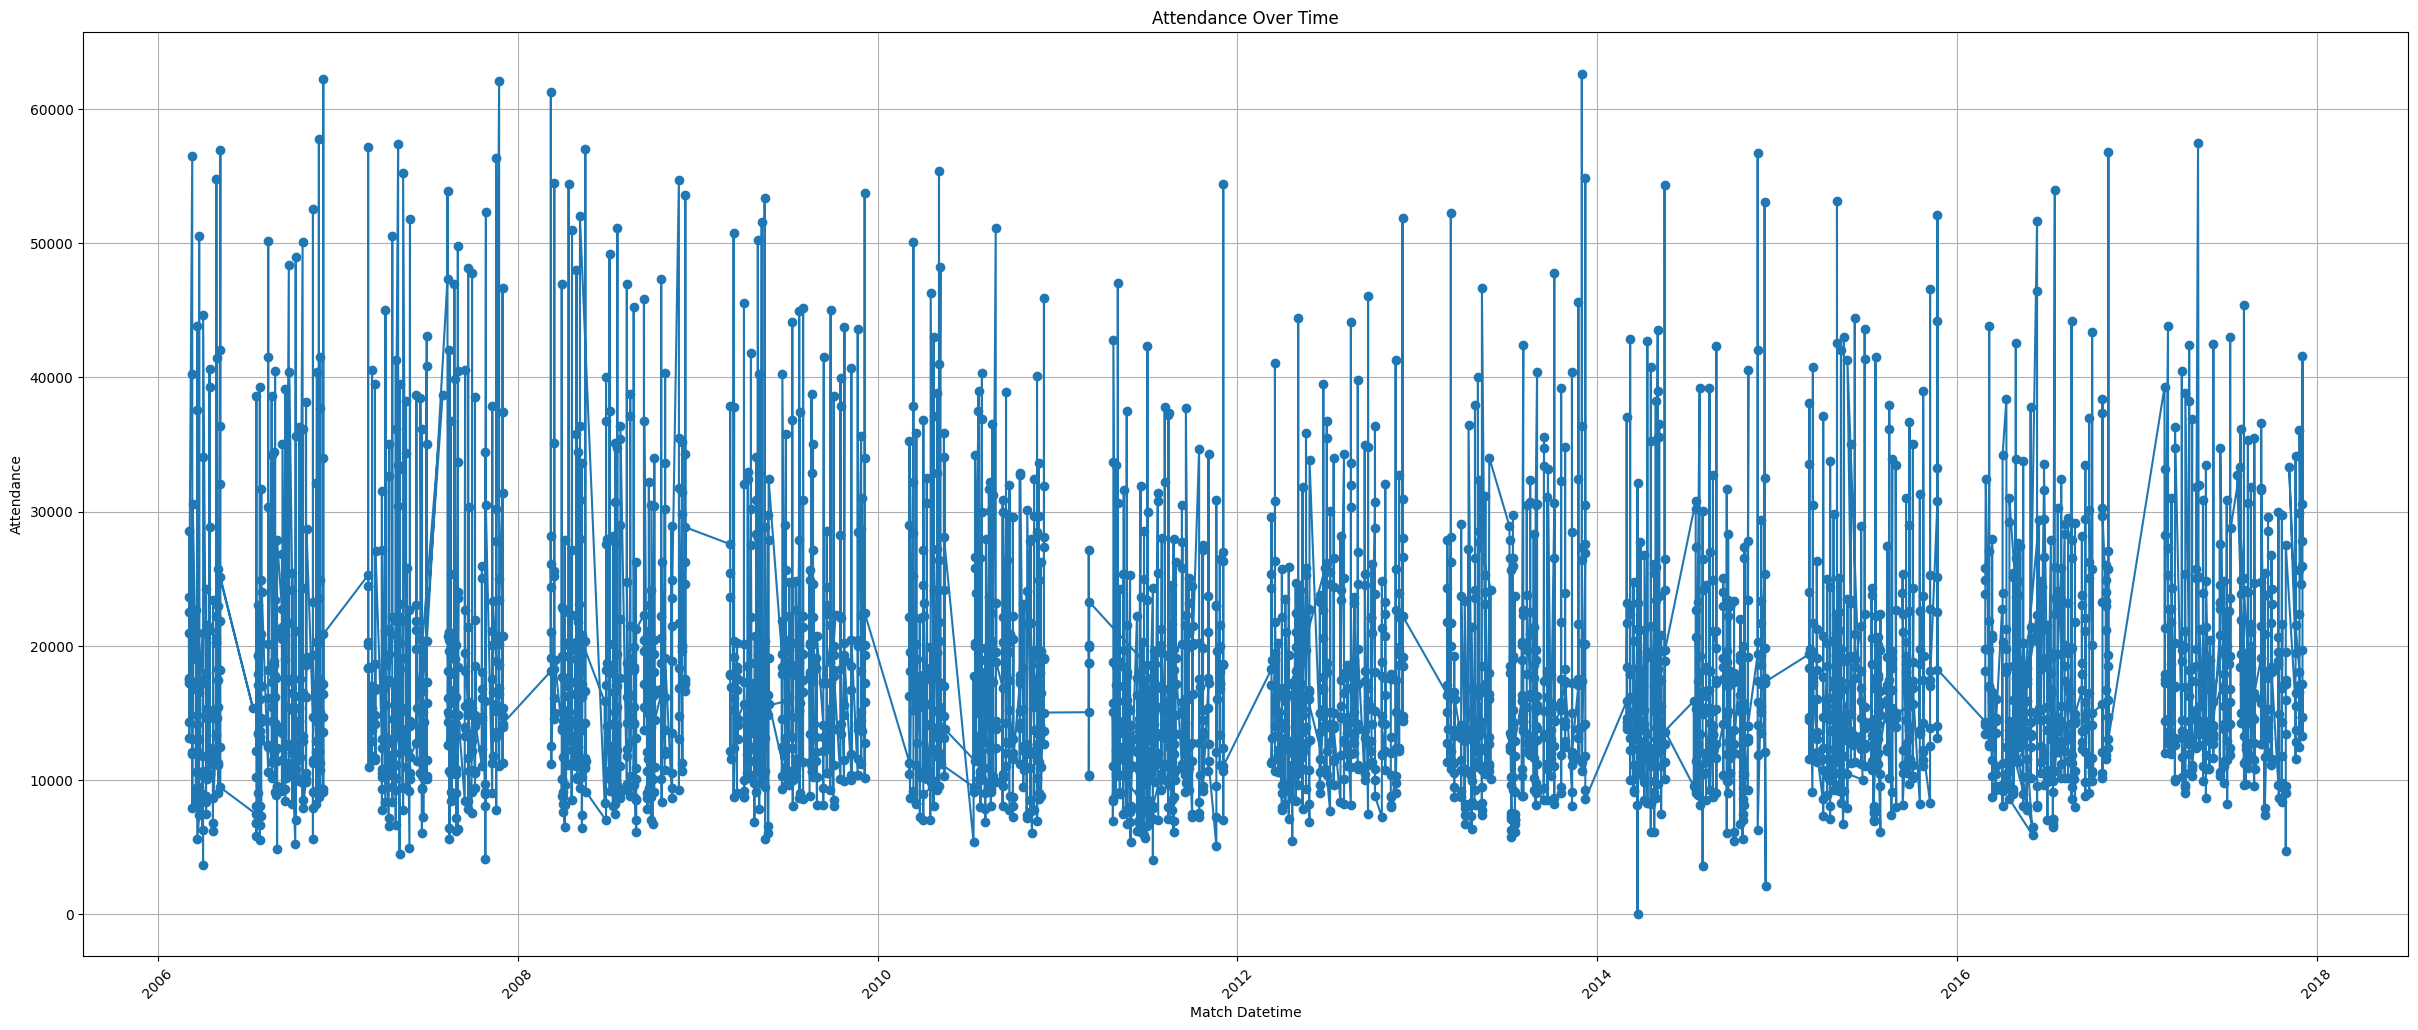

In [149]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(30, 12))

# 绘制attendance随时间变化的折线图
plt.plot(data['match_datetime'], data['attendance'], marker='o', linestyle='-')

# 设置标题和轴标签
plt.title('Attendance Over Time')
plt.xlabel('Match Datetime')
plt.ylabel('Attendance')

# 显示图形
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [150]:
# 将section列进行编码，第1節为1，第2節为2
data['section_encoded'] = data['section'].str.extract('(\d+)').astype(int)

data.drop(columns=['section'], inplace=True)

# 显示前几行以确认结果
data.head(20)


,id,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded
0,9190,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1
1,9191,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1
2,9192,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1
3,9193,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1
4,9194,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1
5,9195,第2日,大宮,千葉,埼玉スタジアム2002,晴,12.6,33,テレビ埼玉/BS(録)/J SPORTS(録),13085,2006-03-05 15:03:00,1
6,9196,第2日,川崎F,新潟,等々力陸上競技場,晴,13.3,34,J SPORTS(録),17444,2006-03-05 15:00:00,1
7,9197,第2日,広島,鹿島,広島ビッグアーチ,曇,12.4,58,BS/J SPORTS(録),17564,2006-03-05 15:06:00,1
8,9198,第2日,横浜FM,京都,日産スタジアム,晴,12.6,34,BS-i/KBS京都(録)/J SPORTS(録),23607,2006-03-05 15:35:00,1
9,9199,第1日,浦和,磐田,埼玉スタジアム2002,晴,16.0,48,TBS(単)/静岡放送/テレビ埼玉(録)/J SPORTS(録),56512,2006-03-11 14:04:00,2


这个箱型图反映了不同阶段（section）的观众出席人数（attendance）的分布情况。具体来说：

1. **中位数（箱子中间的线）**：代表每个阶段观众出席人数的中位数。
2. **箱子的范围**：代表每个阶段观众出席人数的四分位范围（从第1四分位数到第3四分位数）。箱子的上边缘表示第3四分位数（75%的数据点低于这个值），下边缘表示第1四分位数（25%的数据点低于这个值）。
3. **胡须（须线）**：延伸到数据点的最大值和最小值，但不包括异常值。异常值通常显示为独立于胡须的点。
4. **异常值（单独的点）**：这些是明显高于或低于其它数据点的观众出席人数。

从图中可以观察到：

- 每个阶段的观众出席人数分布有一定的差异。
- 中位数显示了不同阶段观众出席人数的典型值。
- 四分位范围显示了出席人数的变动幅度。
- 可能存在一些异常值，表示在某些阶段有极高或极低的出席人数。


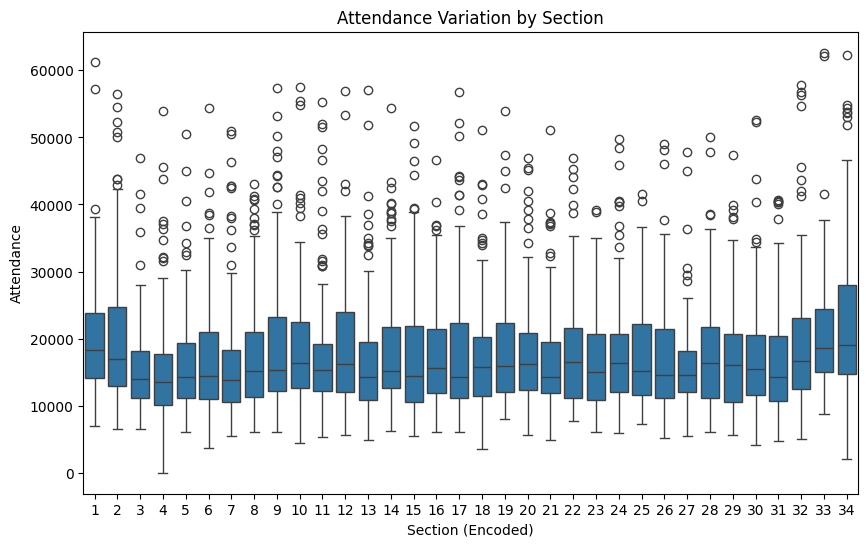

In [151]:
import seaborn as sns

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制section_encoded与attendance之间的关系图
sns.boxplot(x='section_encoded', y='attendance', data=data)

# 设置标题和轴标签
plt.title('Attendance Variation by Section')
plt.xlabel('Section (Encoded)')
plt.ylabel('Attendance')

# 显示图形
plt.show()


In [152]:
data

,id,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded
0,9190,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1
1,9191,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1
2,9192,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1
3,9193,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1
4,9194,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,第1日,川崎Ｆ,大宮,等々力陸上競技場,晴,11.7,40,DAZN/NHK BS1,25904,2017-12-02 14:03:00,34
3668,19377,第1日,甲府,仙台,山梨中銀スタジアム,晴,18.3,34,DAZN,14680,2017-12-02 14:03:00,34
3669,19378,第1日,新潟,Ｃ大阪,デンカビッグスワンスタジアム,晴,6.7,60,DAZN,19684,2017-12-02 14:04:00,34
3670,19379,第1日,磐田,鹿島,ヤマハスタジアム(磐田),晴,17.7,30,DAZN/NHK総合,14696,2017-12-02 14:03:00,34


In [153]:
# 统计venue的unique值并以字典形式输出
unique_venues = data['venue'].unique()
venue_dict = {i: venue for i, venue in enumerate(unique_venues)}

venue_dict


{0: '万博記念競技場',
 1: '山梨県小瀬スポーツ公園陸上競技場',
 2: '味の素スタジアム',
 3: '静岡スタジアムエコパ',
 4: '名古屋市瑞穂陸上競技場',
 5: '埼玉スタジアム2002',
 6: '等々力陸上競技場',
 7: '広島ビッグアーチ',
 8: '日産スタジアム',
 9: 'フクダ電子アリーナ',
 10: '新潟スタジアム',
 11: '日本平スタジアム',
 12: '県立カシマサッカースタジアム',
 13: '京都市西京極総合運動公園陸上競技場兼球技場',
 14: '東平尾公園博多の森球技場',
 15: '九州石油ドーム',
 16: '大阪長居スタジアム',
 17: 'ヤマハスタジアム(磐田)',
 18: '豊田スタジアム',
 19: 'さいたま市浦和駒場スタジアム',
 20: '松本平広域公園総合球技場',
 21: '石川県西部緑地公園陸上競技場',
 22: '熊谷スポーツ文化公園陸上競技場',
 23: '国立競技場',
 24: '横浜市三ツ沢公園球技場',
 25: '大阪長居第2陸上競技場',
 26: '熊本県民総合運動公園陸上競技場',
 27: '日立柏サッカー場',
 28: '東北電力ビッグスワンスタジアム',
 29: 'ホームズスタジアム神戸',
 30: '柏の葉公園総合競技場',
 31: 'エコパスタジアム',
 32: '神戸総合運動公園ユニバー記念競技場',
 33: '名古屋市瑞穂球技場',
 34: 'NACK5スタジアム大宮',
 35: '札幌ドーム',
 36: 'ニッパツ三ツ沢球技場',
 37: '鹿児島県立鴨池陸上競技場',
 38: '札幌厚別公園競技場',
 39: 'アウトソーシングスタジアム日本平',
 40: 'NDソフトスタジアム山形',
 41: '平塚競技場',
 42: 'ユアテックスタジアム仙台',
 43: '宮城スタジアム',
 44: 'キンチョウスタジアム',
 45: '山梨中銀スタジアム',
 46: 'レベルファイブスタジアム',
 47: 'コカ・コーラウエスト広島スタジアム',
 48: 'ベストアメニティスタジアム',
 49: '佐賀県総合運動場陸上競技場',
 50: 'エディオンスタジアム広島'

In [154]:
# 统计venue的unique值并以字典形式输出
unique_venues = data['venue'].unique()
venue_dict = {i: venue for i, venue in enumerate(unique_venues)}

# 显示venue_dict中的venue名称
for key, value in venue_dict.items():
    print(f"{key}: {value}")


0: 万博記念競技場
1: 山梨県小瀬スポーツ公園陸上競技場
2: 味の素スタジアム
3: 静岡スタジアムエコパ
4: 名古屋市瑞穂陸上競技場
5: 埼玉スタジアム2002
6: 等々力陸上競技場
7: 広島ビッグアーチ
8: 日産スタジアム
9: フクダ電子アリーナ
10: 新潟スタジアム
11: 日本平スタジアム
12: 県立カシマサッカースタジアム
13: 京都市西京極総合運動公園陸上競技場兼球技場
14: 東平尾公園博多の森球技場
15: 九州石油ドーム
16: 大阪長居スタジアム
17: ヤマハスタジアム(磐田)
18: 豊田スタジアム
19: さいたま市浦和駒場スタジアム
20: 松本平広域公園総合球技場
21: 石川県西部緑地公園陸上競技場
22: 熊谷スポーツ文化公園陸上競技場
23: 国立競技場
24: 横浜市三ツ沢公園球技場
25: 大阪長居第2陸上競技場
26: 熊本県民総合運動公園陸上競技場
27: 日立柏サッカー場
28: 東北電力ビッグスワンスタジアム
29: ホームズスタジアム神戸
30: 柏の葉公園総合競技場
31: エコパスタジアム
32: 神戸総合運動公園ユニバー記念競技場
33: 名古屋市瑞穂球技場
34: NACK5スタジアム大宮
35: 札幌ドーム
36: ニッパツ三ツ沢球技場
37: 鹿児島県立鴨池陸上競技場
38: 札幌厚別公園競技場
39: アウトソーシングスタジアム日本平
40: NDソフトスタジアム山形
41: 平塚競技場
42: ユアテックスタジアム仙台
43: 宮城スタジアム
44: キンチョウスタジアム
45: 山梨中銀スタジアム
46: レベルファイブスタジアム
47: コカ・コーラウエスト広島スタジアム
48: ベストアメニティスタジアム
49: 佐賀県総合運動場陸上競技場
50: エディオンスタジアム広島
51: 大分銀行ドーム
52: IAIスタジアム日本平
53: ShonanBMWスタジアム平塚
54: ヤンマースタジアム長居
55: デンカビッグスワンスタジアム
56: 鳴門・大塚スポーツパークポカリスエットスタジアム
57: ノエビアスタジアム神戸
58: パロマ瑞穂スタジアム
59: 市立吹田サッカースタジアム


In [155]:
import pandas as pd

# 读取 venue_information.csv 文件
venue_info_path = 'venue_information.csv'
venue_info = pd.read_csv(venue_info_path)

# 统计 venue 的 unique 值并以字典形式输出
unique_venues = data['venue'].unique()
venue_dict = {i: venue for i, venue in enumerate(unique_venues)}

# 遍历 venue_dict 中的 value，检查是否包含在 venue_info 的 venue 列中
for key, value in venue_dict.items():
    if value in venue_info['venue'].values:
        # print(f"{value} is in the venue column of venue_information.csv")
        print('good')
    else:
        print(f"{value} is NOT in the venue column of venue_information.csv")


good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good


In [156]:
# 统计 venue 的 unique 值并以字典形式输出
unique_venues = data['venue'].unique()
venue_dict = {i: venue for i, venue in enumerate(unique_venues)}

# 创建 venue 到 capacity 的映射字典
venue_capacity_dict = venue_info.set_index('venue')['capacity'].to_dict()

# 将 venue 对应的 capacity 添加到 data 中，创建新的 venue_capacity 列
data['venue_capacity'] = data['venue'].map(venue_capacity_dict)

# 显示前几行以确认结果
print(data[['venue', 'venue_capacity']].head())

              venue  venue_capacity
0           万博記念競技場           21000
1  山梨県小瀬スポーツ公園陸上競技場           15859
2          味の素スタジアム           47851
3        静岡スタジアムエコパ           51697
4       名古屋市瑞穂陸上競技場           20223


In [157]:
data

,id,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded,venue_capacity
0,9190,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1,21000
1,9191,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1,15859
2,9192,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1,47851
3,9193,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1,51697
4,9194,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1,20223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,第1日,川崎Ｆ,大宮,等々力陸上競技場,晴,11.7,40,DAZN/NHK BS1,25904,2017-12-02 14:03:00,34,26232
3668,19377,第1日,甲府,仙台,山梨中銀スタジアム,晴,18.3,34,DAZN,14680,2017-12-02 14:03:00,34,17000
3669,19378,第1日,新潟,Ｃ大阪,デンカビッグスワンスタジアム,晴,6.7,60,DAZN,19684,2017-12-02 14:04:00,34,41684
3670,19379,第1日,磐田,鹿島,ヤマハスタジアム(磐田),晴,17.7,30,DAZN/NHK総合,14696,2017-12-02 14:03:00,34,15165


In [158]:
# 统计venue的unique值并以字典形式编码
unique_venues = data['venue'].unique()
venue_dict = {venue: i for i, venue in enumerate(unique_venues)}

# 使用字典对venue进行编码
data['venue_encoded'] = data['venue'].map(venue_dict)
# 删除原来的venue列
data.drop(columns=['venue'], inplace=True)

data

,id,round,home_team,away_team,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded
0,9190,第1日,G大阪,浦和,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1,21000,0
1,9191,第2日,甲府,清水,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1,15859,1
2,9192,第2日,FC東京,大分,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1,47851,2
3,9193,第2日,磐田,福岡,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1,51697,3
4,9194,第2日,名古屋,C大阪,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1,20223,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,第1日,川崎Ｆ,大宮,晴,11.7,40,DAZN/NHK BS1,25904,2017-12-02 14:03:00,34,26232,6
3668,19377,第1日,甲府,仙台,晴,18.3,34,DAZN,14680,2017-12-02 14:03:00,34,17000,45
3669,19378,第1日,新潟,Ｃ大阪,晴,6.7,60,DAZN,19684,2017-12-02 14:04:00,34,41684,55
3670,19379,第1日,磐田,鹿島,晴,17.7,30,DAZN/NHK総合,14696,2017-12-02 14:03:00,34,15165,17


In [159]:
data.to_csv('new_data.csv', index=False)

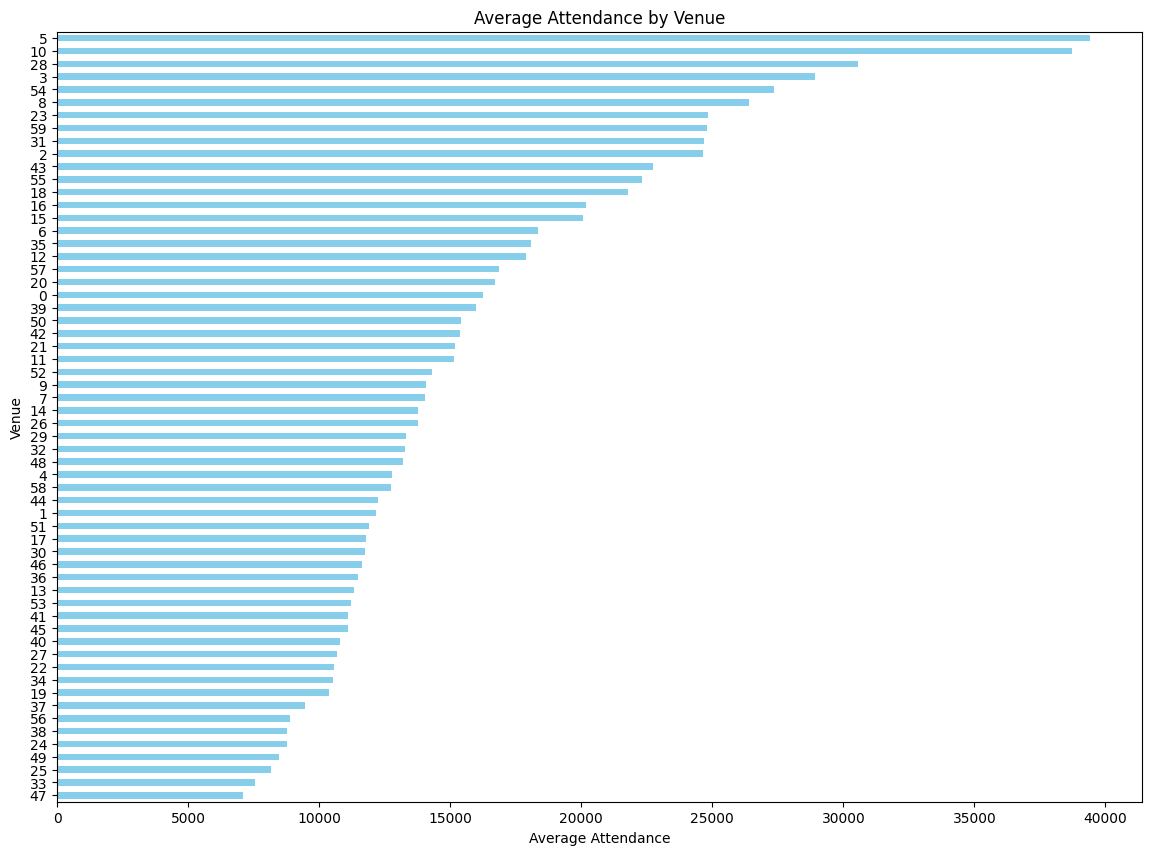

In [160]:
import matplotlib.pyplot as plt

# 计算每个venue的平均attendance
venue_attendance_mean = data.groupby('venue_encoded')['attendance'].mean().sort_values()

# 设置图形大小
plt.figure(figsize=(14, 10))

# 绘制条形图
venue_attendance_mean.plot(kind='barh', color='skyblue')

# 设置标题和轴标签
plt.title('Average Attendance by Venue')
plt.xlabel('Average Attendance')
plt.ylabel('Venue')

# 显示图形
plt.show()


In [161]:
# 创建编码字典
round_dict = {'第1日': 1, '第2日': 2, '第3日': 3, '第4日': 4}

# 使用字典对round进行编码
data['round_encoded'] = data['round'].map(round_dict)

# 删除原来的round列
data.drop(columns=['round'], inplace=True)

# 显示前几行以确认结果
data.head()


,id,home_team,away_team,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded
0,9190,G大阪,浦和,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1,21000,0,1
1,9191,甲府,清水,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1,15859,1,2
2,9192,FC東京,大分,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1,47851,2,2
3,9193,磐田,福岡,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1,51697,3,2
4,9194,名古屋,C大阪,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1,20223,4,2


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\1080523935.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='round_encoded', y='attendance', data=round_attendance_mean, palette='coolwarm')


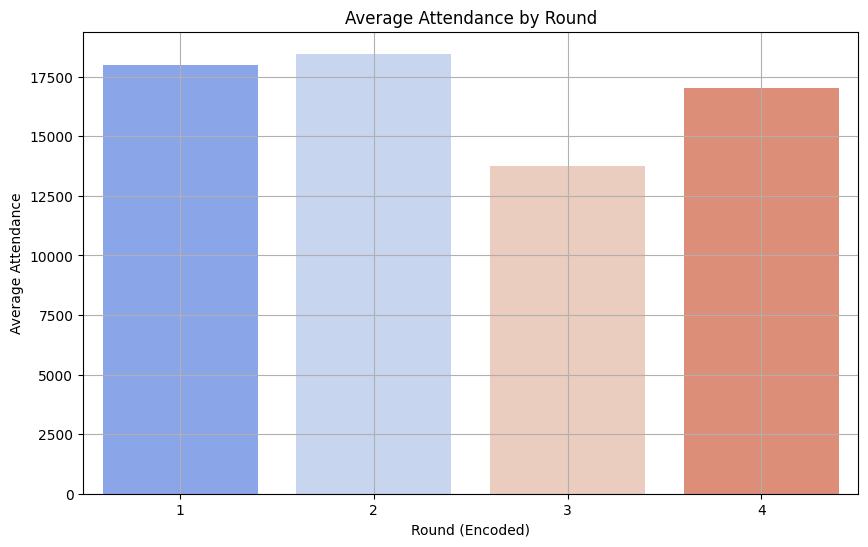

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每个 round_encoded 的平均 attendance
round_attendance_mean = data.groupby('round_encoded')['attendance'].mean().reset_index()

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制条形图
sns.barplot(x='round_encoded', y='attendance', data=round_attendance_mean, palette='coolwarm')

# 设置标题和轴标签
plt.title('Average Attendance by Round')
plt.xlabel('Round (Encoded)')
plt.ylabel('Average Attendance')

# 显示图形
plt.xticks()
plt.grid(True)
plt.show()


In [163]:
# 查看weather列的unique值
unique_weather = data['weather'].unique()
unique_weather


array(['晴', '曇', '屋内', '曇時々晴', '雨', '曇のち雨', '晴一時雨', '晴時々曇', '晴のち曇',
       '曇一時雨', '雨のち曇', '雨一時曇', '曇のち雨のち屋内', '曇時々晴のち屋内', '曇のち晴', '曇時々雨',
       '雨のち曇時々雨', '曇時々雪', '晴一時曇', '雨時々曇', '曇一時雨のち曇', '曇のち雨一時雷', '晴時々曇一時雨',
       '霧', '雷雨のち曇', '曇一時雷雨のち雨', '晴一時雨のち曇', '曇のち雷雨', '雨一時曇のち雨', '雪',
       '雨のち曇のち晴', '晴のち雨', '曇一時晴', '曇一時雨のち晴', '雨のち晴', '晴のち曇一時雨',
       '曇一時雷雨のち曇', '晴時々雪', '雨時々晴', '曇時々雨のち晴', '曇時々晴一時雨', '雨のち曇一時雨',
       '晴のち雪', '雨一時雷雨', '曇のち雨のち曇', '曇のち雨のち晴', '曇晴', '曇のち霧', '雨のち曇のち雨'],
      dtype=object)

C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3830795804.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='attendance', data=weather_attendance_mean, palette='viridis')


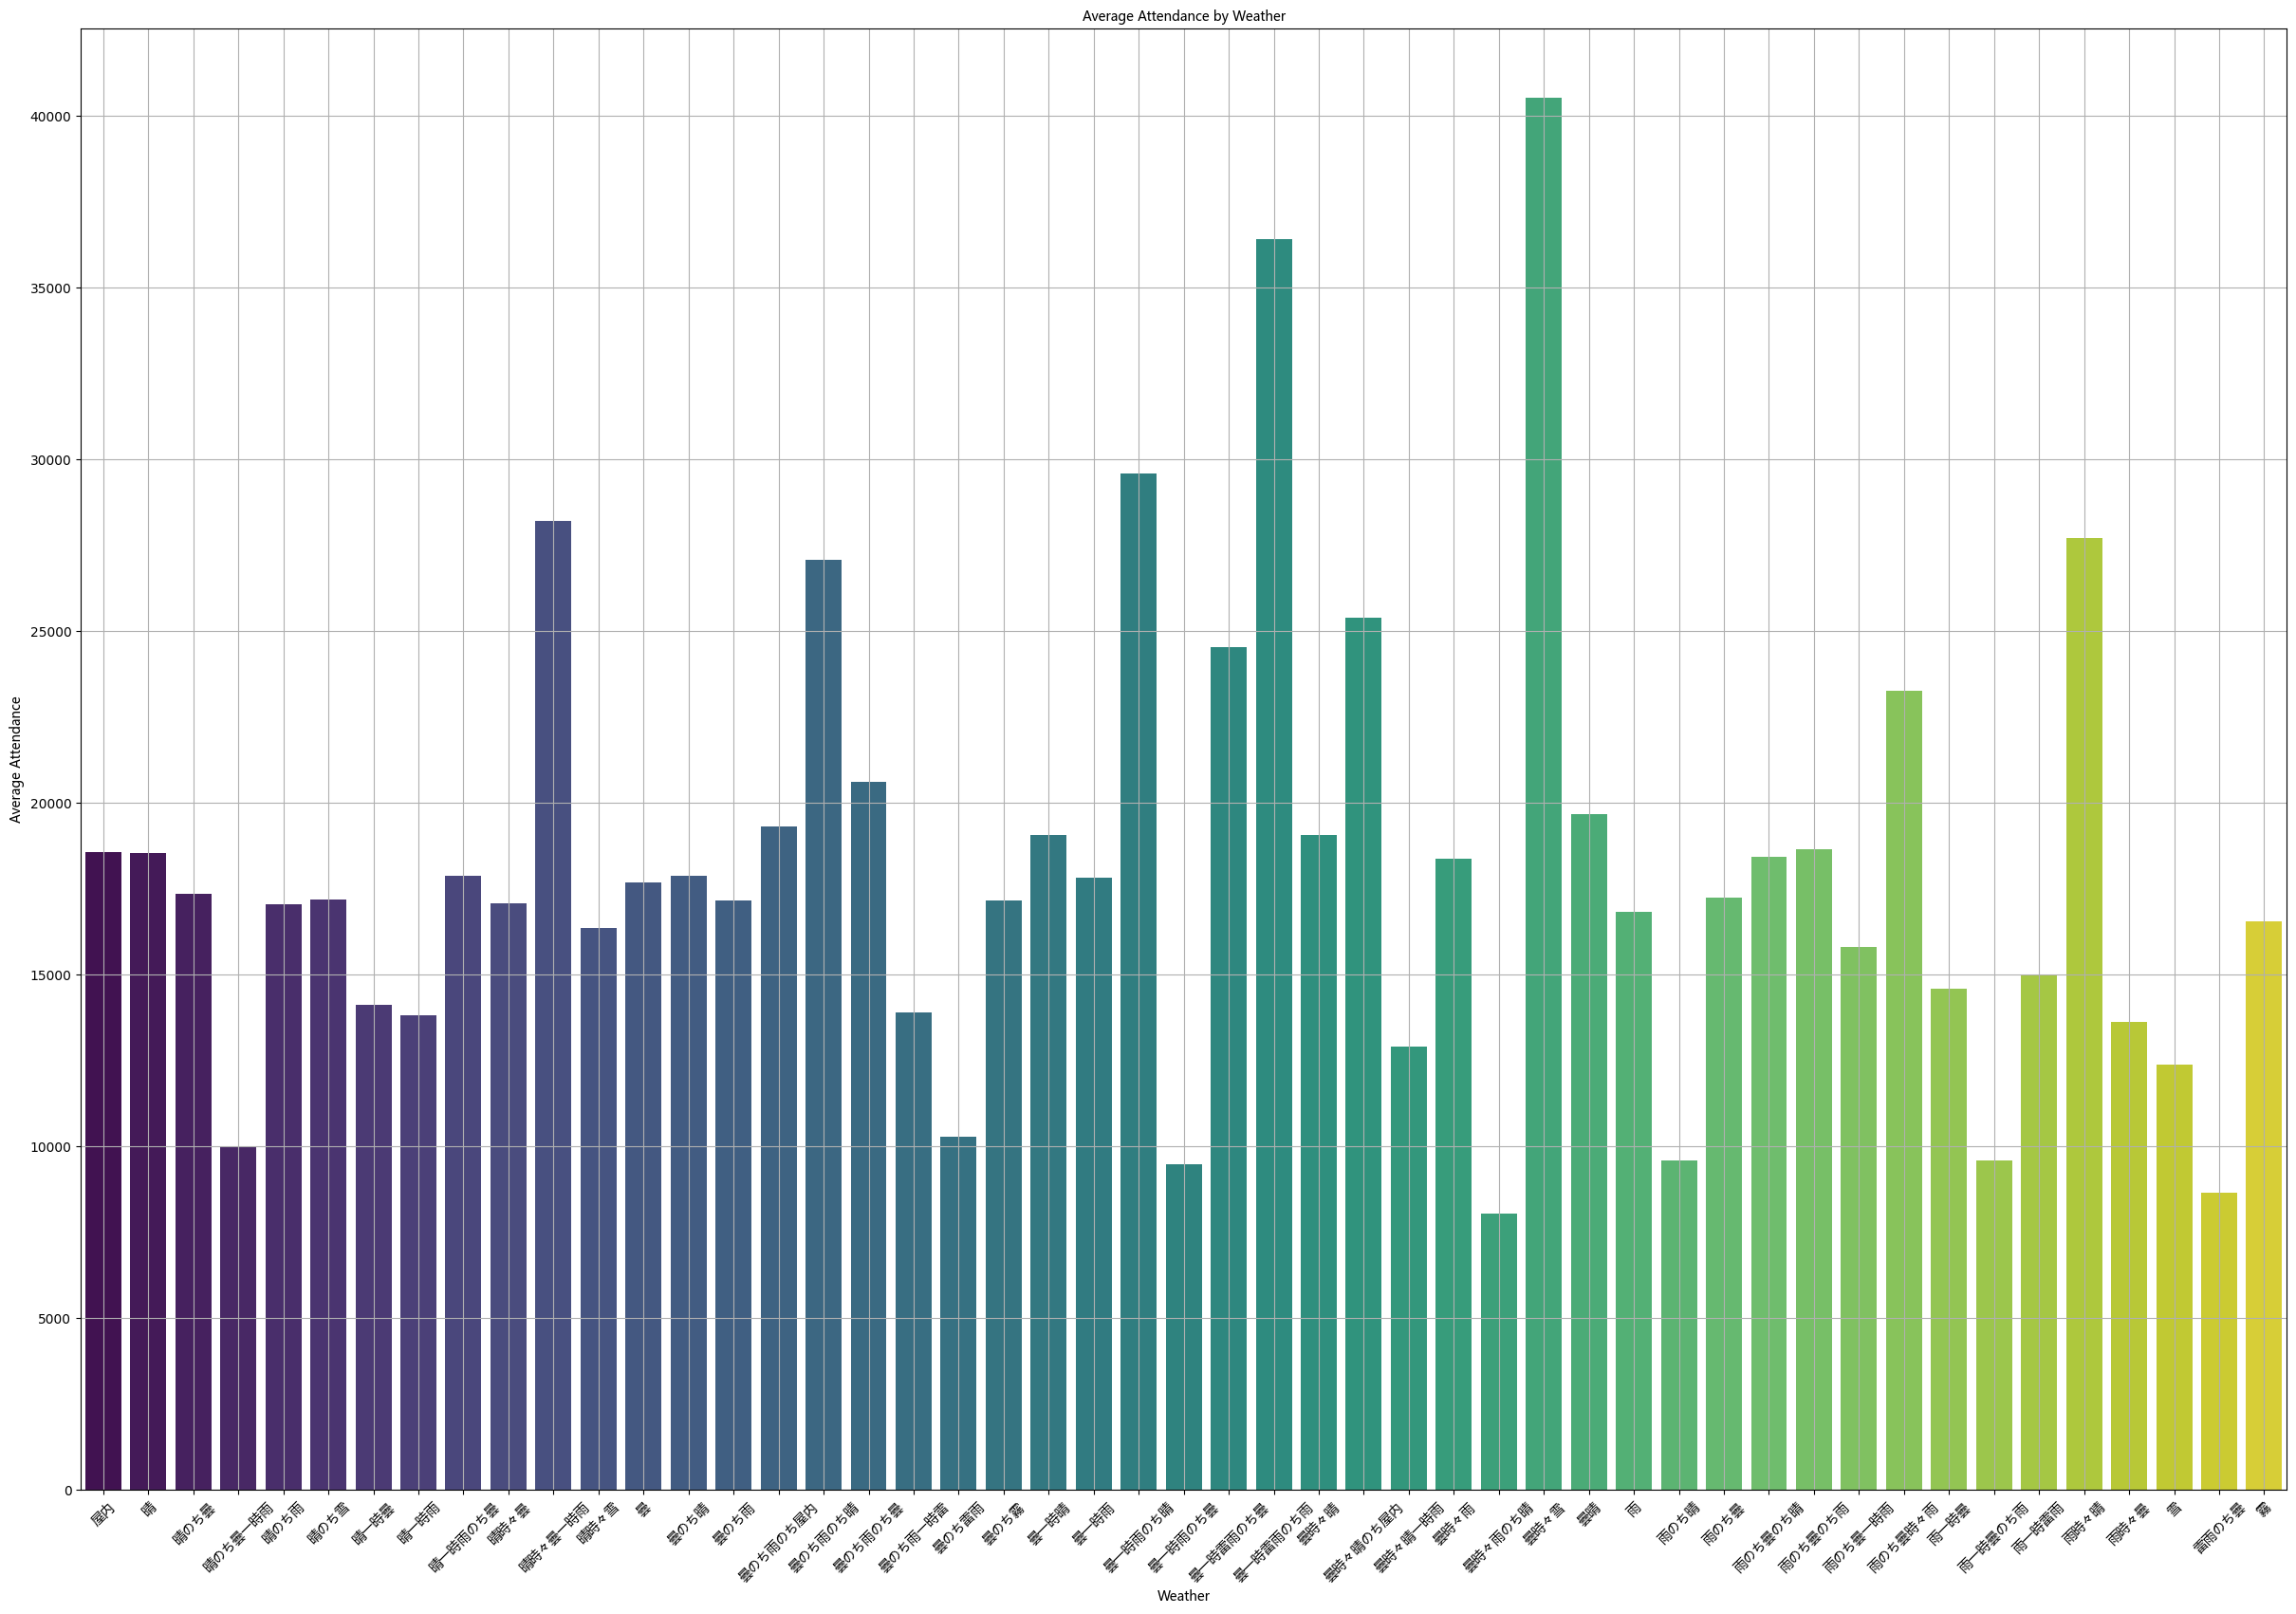

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 设置中文字体，以显示日文字符
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 使用微软雅黑字体
prop = fm.FontProperties(fname=font_path)

# 计算每种weather的平均attendance
weather_attendance_mean = data.groupby('weather')['attendance'].mean().reset_index()

# 设置图形大小
plt.figure(figsize=(30, 20))

# 绘制条形图
sns.barplot(x='weather', y='attendance', data=weather_attendance_mean, palette='viridis')

# 设置标题和轴标签
plt.title('Average Attendance by Weather', fontproperties=prop)
plt.xlabel('Weather', fontproperties=prop)
plt.ylabel('Average Attendance', fontproperties=prop)

# 旋转x轴标签并设置字体
plt.xticks(rotation=45, fontproperties=prop)
plt.grid(True)

# 显示图形
plt.show()


In [165]:
# 计算每种 weather 的平均 attendance
weather_attendance_mean = data.groupby('weather')['attendance'].mean().reset_index()

# 打印每种天气对应的 attendance 平均值
for index, row in weather_attendance_mean.iterrows():
    print(f"Weather: {row['weather']}, Average Attendance: {row['attendance']}")


Weather: 屋内, Average Attendance: 18574.383838383837
Weather: 晴, Average Attendance: 18531.939277899342
Weather: 晴のち曇, Average Attendance: 17344.702702702703
Weather: 晴のち曇一時雨, Average Attendance: 9971.0
Weather: 晴のち雨, Average Attendance: 17043.4
Weather: 晴のち雪, Average Attendance: 17189.0
Weather: 晴一時曇, Average Attendance: 14111.666666666666
Weather: 晴一時雨, Average Attendance: 13826.166666666666
Weather: 晴一時雨のち曇, Average Attendance: 17885.0
Weather: 晴時々曇, Average Attendance: 17086.41176470588
Weather: 晴時々曇一時雨, Average Attendance: 28214.0
Weather: 晴時々雪, Average Attendance: 16353.0
Weather: 曇, Average Attendance: 17679.80625
Weather: 曇のち晴, Average Attendance: 17871.574074074073
Weather: 曇のち雨, Average Attendance: 17164.10465116279
Weather: 曇のち雨のち屋内, Average Attendance: 19304.0
Weather: 曇のち雨のち晴, Average Attendance: 27081.0
Weather: 曇のち雨のち曇, Average Attendance: 20622.5
Weather: 曇のち雨一時雷, Average Attendance: 13889.0
Weather: 曇のち雷雨, Average Attendance: 10266.0
Weather: 曇のち霧, Average Attendance: 1

In [166]:
# 筛选出曇時々雪天气条件下的比赛
cloudy_snowy_games = data[data['weather'] == '曇時々雪']

# 显示这些比赛的详细信息
cloudy_snowy_games


,id,home_team,away_team,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded
322,10001,新潟,浦和,曇時々雪,2.5,68,スカパー!(パーフェクト チョイス)/e2(スカチャン!HV),40524,2007-03-11 16:01:00,2,41684,28,2


这个天气下居然只有一条比赛，是绝对的偶然。我们通过天气进行处理，消除偶然

In [167]:
# 设置门槛，至少需要有n场比赛
threshold = 6

# 计算每种天气的比赛场次
weather_counts = data['weather'].value_counts()

# 过滤掉比赛场次较少的天气条件
filtered_weather = weather_counts[weather_counts >= threshold].index

# 仅保留符合条件的天气数据
filtered_data = data[data['weather'].isin(filtered_weather)]

# 计算过滤后的每种天气的平均attendance
filtered_weather_attendance_mean = filtered_data.groupby('weather')['attendance'].mean().reset_index()

# 打印结果
for index, row in filtered_weather_attendance_mean.iterrows():
    print(f"Weather: {row['weather']}, Average Attendance: {row['attendance']}")


Weather: 屋内, Average Attendance: 18574.383838383837
Weather: 晴, Average Attendance: 18531.939277899342
Weather: 晴のち曇, Average Attendance: 17344.702702702703
Weather: 晴のち雨, Average Attendance: 17043.4
Weather: 晴一時曇, Average Attendance: 14111.666666666666
Weather: 晴一時雨, Average Attendance: 13826.166666666666
Weather: 晴時々曇, Average Attendance: 17086.41176470588
Weather: 曇, Average Attendance: 17679.80625
Weather: 曇のち晴, Average Attendance: 17871.574074074073
Weather: 曇のち雨, Average Attendance: 17164.10465116279
Weather: 曇一時雨, Average Attendance: 17814.928571428572
Weather: 曇時々晴, Average Attendance: 19066.5641025641
Weather: 曇時々雨, Average Attendance: 18371.214285714286
Weather: 雨, Average Attendance: 16812.35842293907
Weather: 雨のち曇, Average Attendance: 17242.835616438355
Weather: 雨時々曇, Average Attendance: 13623.875


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\1827355887.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='attendance', data=weather_attendance_mean, palette='viridis')


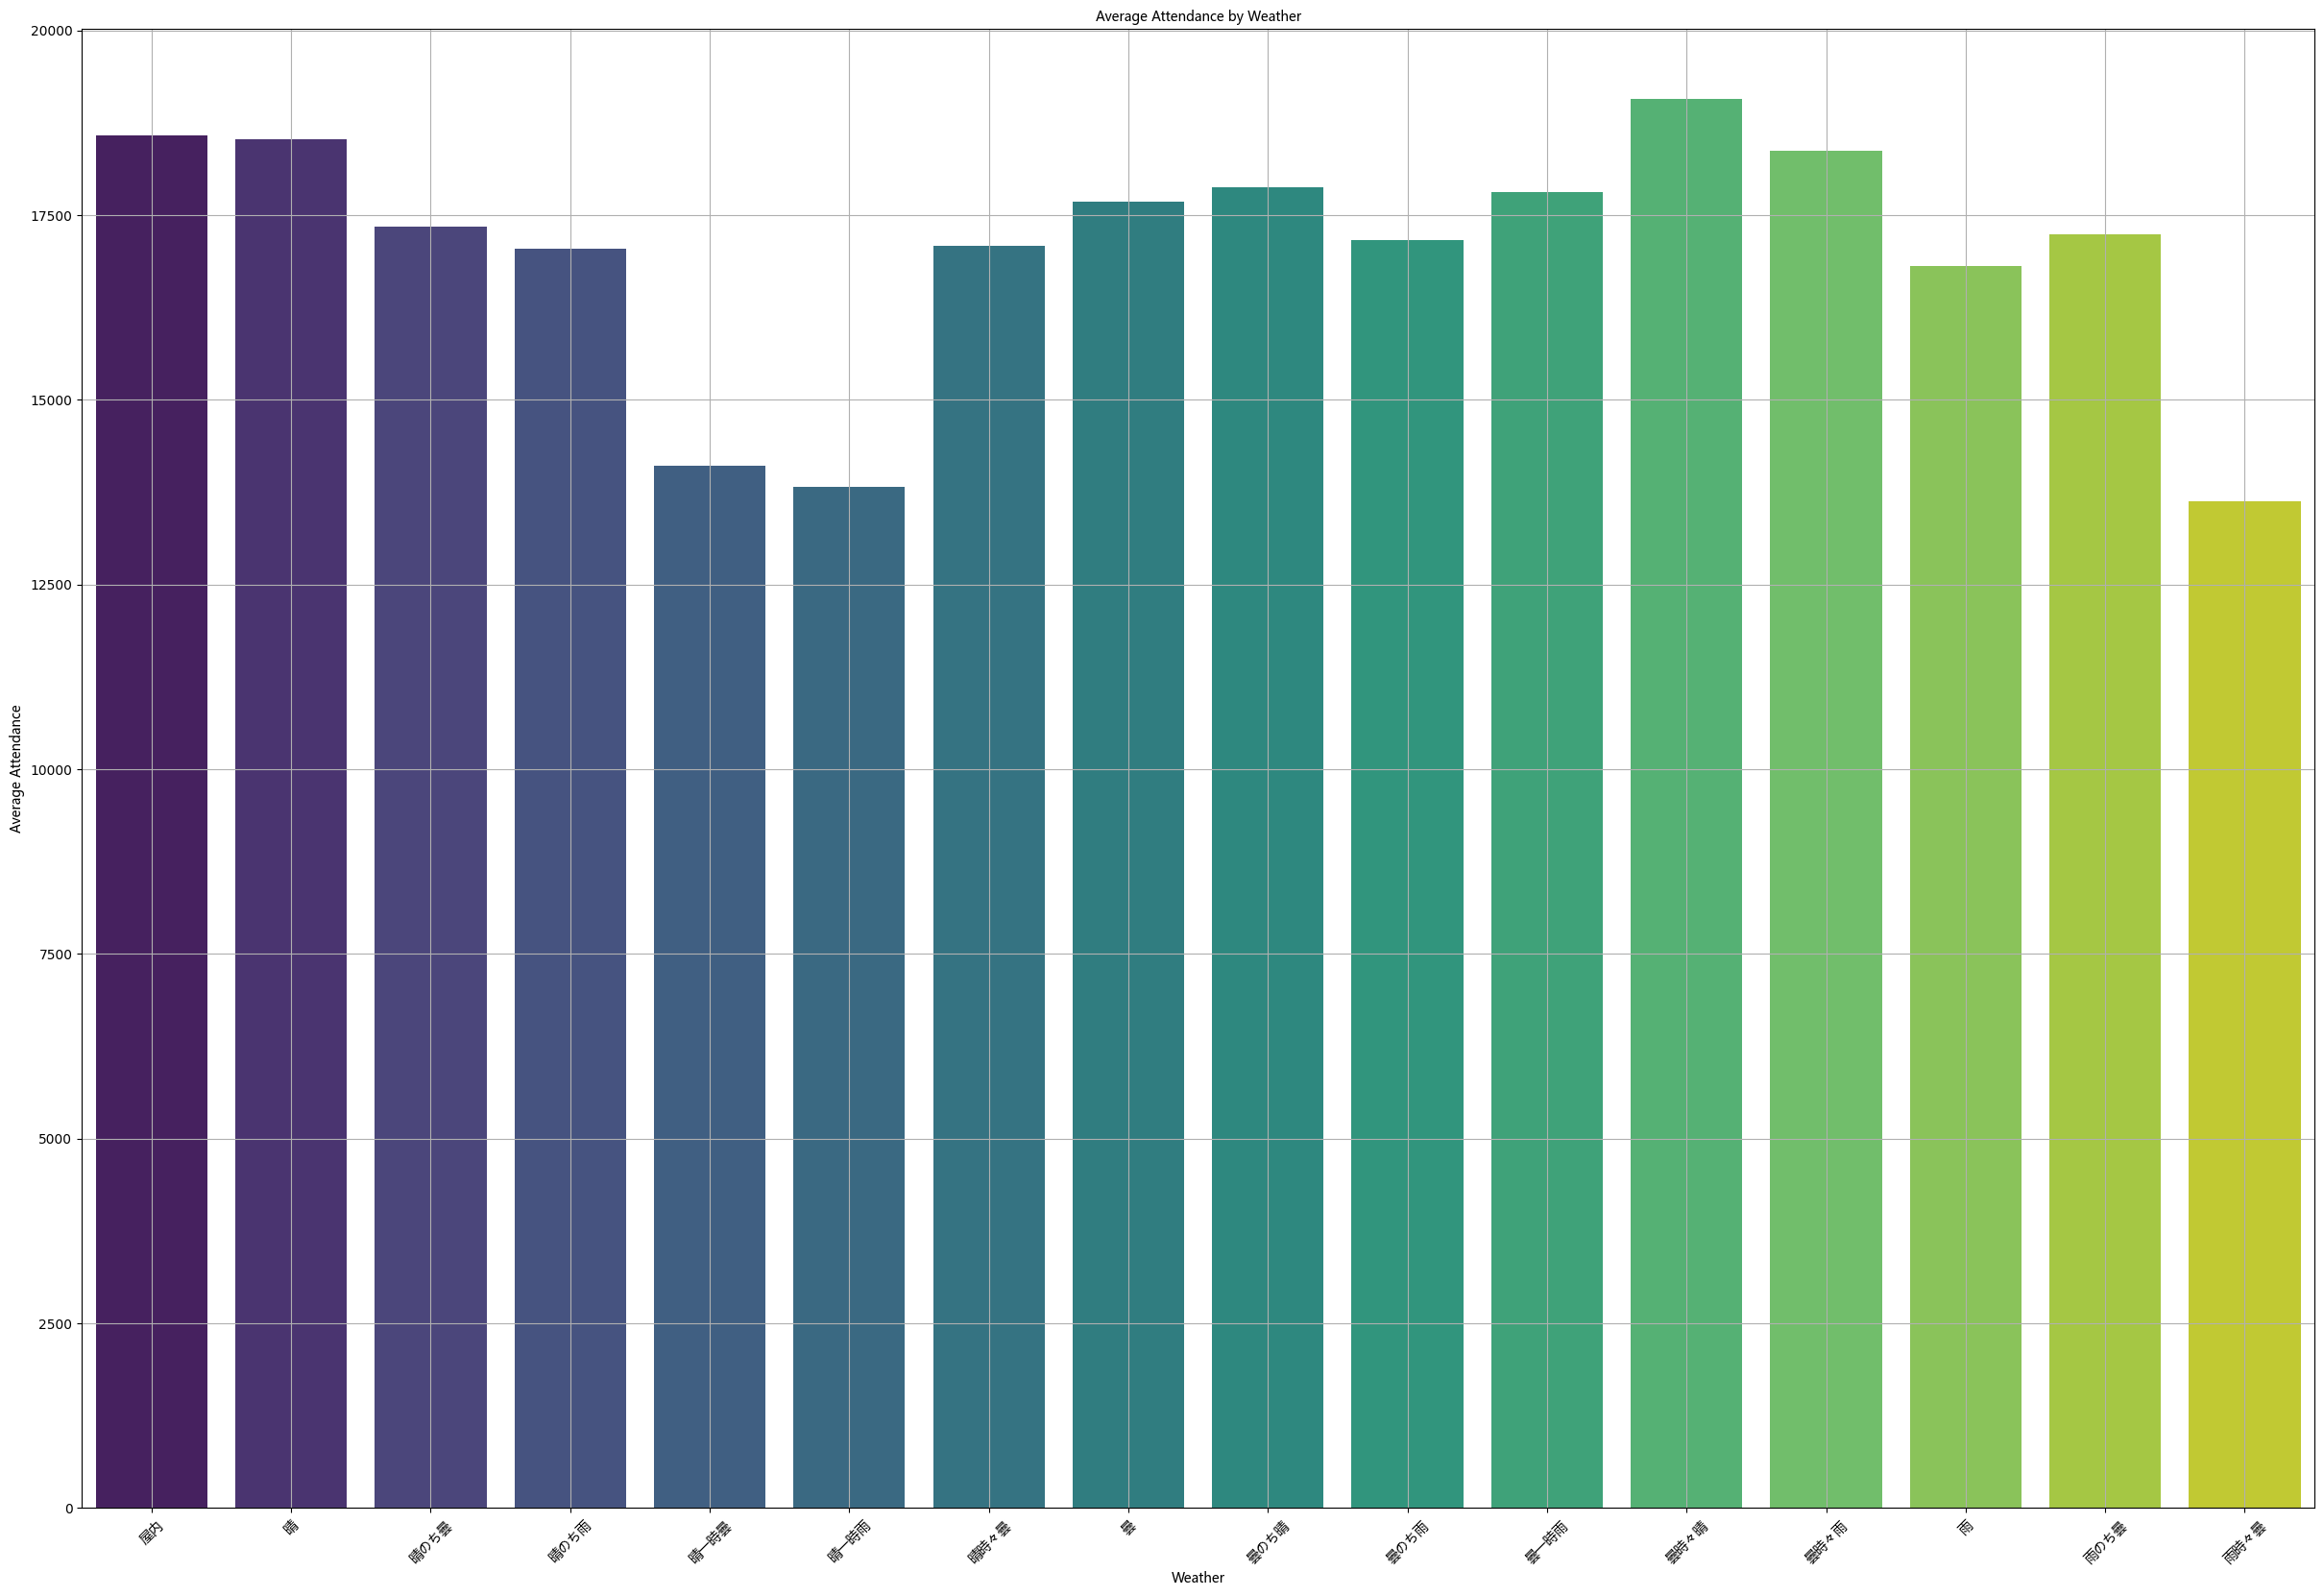

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 设置中文字体，以显示日文字符
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 使用微软雅黑字体
prop = fm.FontProperties(fname=font_path)

# 计算每种weather的平均attendance
weather_attendance_mean = filtered_data.groupby('weather')['attendance'].mean().reset_index()

# 设置图形大小
plt.figure(figsize=(30, 20))

# 绘制条形图
sns.barplot(x='weather', y='attendance', data=weather_attendance_mean, palette='viridis')

# 设置标题和轴标签
plt.title('Average Attendance by Weather', fontproperties=prop)
plt.xlabel('Weather', fontproperties=prop)
plt.ylabel('Average Attendance', fontproperties=prop)

# 旋转x轴标签并设置字体
plt.xticks(rotation=45, fontproperties=prop)
plt.grid(True)

# 显示图形
plt.show()


In [169]:
filtered_data.head(50)

,id,home_team,away_team,weather,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded
0,9190,G大阪,浦和,晴,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1,21000,0,1
1,9191,甲府,清水,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1,15859,1,2
2,9192,FC東京,大分,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1,47851,2,2
3,9193,磐田,福岡,晴,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1,51697,3,2
4,9194,名古屋,C大阪,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1,20223,4,2
5,9195,大宮,千葉,晴,12.6,33,テレビ埼玉/BS(録)/J SPORTS(録),13085,2006-03-05 15:03:00,1,62010,5,2
6,9196,川崎F,新潟,晴,13.3,34,J SPORTS(録),17444,2006-03-05 15:00:00,1,26232,6,2
7,9197,広島,鹿島,曇,12.4,58,BS/J SPORTS(録),17564,2006-03-05 15:06:00,1,36894,7,2
8,9198,横浜FM,京都,晴,12.6,34,BS-i/KBS京都(録)/J SPORTS(録),23607,2006-03-05 15:35:00,1,71624,8,2
9,9199,浦和,磐田,晴,16.0,48,TBS(単)/静岡放送/テレビ埼玉(録)/J SPORTS(録),56512,2006-03-11 14:04:00,2,62010,5,1


In [170]:
# 创建编码字典
weather_dict = {weather: i for i, weather in enumerate(filtered_weather)}

# 使用字典对weather进行编码
filtered_data['weather_encoded'] = filtered_data['weather'].map(weather_dict)

# 删除原来的weather列
filtered_data.drop(columns=['weather'], inplace=True)


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\2481341223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weather_encoded'] = filtered_data['weather'].map(weather_dict)
C:\Users\29724\AppData\Local\Temp\ipykernel_20220\2481341223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['weather'], inplace=True)


In [171]:
# 显示前几行以确认结果
filtered_data.head(1000)


,id,home_team,away_team,temperature,humidity,broadcasters,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded
0,9190,G大阪,浦和,8.3,40,NHK総合/J SPORTS(録),20916,2006-03-04 16:04:00,1,21000,0,1,0
1,9191,甲府,清水,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,2006-03-05 13:00:00,1,15859,1,2,0
2,9192,FC東京,大分,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2006-03-05 13:35:00,1,47851,2,2,0
3,9193,磐田,福岡,11.6,42,J SPORTS,28564,2006-03-05 14:04:00,1,51697,3,2,0
4,9194,名古屋,C大阪,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,2006-03-05 14:04:00,1,20223,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,11708,大分,横浜FM,26.4,27,スカパー・e2(J sports Plus),18245,2009-05-09 14:03:00,11,31997,15,1,0
1011,11709,千葉,広島,23.6,49,スカパー・e2(TBSチャンネル)/BS-TBS,14182,2009-05-09 16:05:00,11,19470,9,1,0
1012,11710,山形,新潟,21.1,53,スカパー(スカチャンHD、スカチャン)/e2スカチャンHD,17171,2009-05-09 18:04:00,11,20638,40,1,0
1013,11711,浦和,川崎F,29.3,41,スカパー・e2(TBSチャンネル)/TBS(単)/テレ玉(録),51594,2009-05-10 14:05:00,11,62010,5,2,0


In [172]:
# 查看broadcasters列的unique值
unique_broadcasters = filtered_data['broadcasters'].unique()
unique_broadcasters


array(['NHK総合/J SPORTS(録)', '山梨放送/テレビ静岡(録)/J SPORTS(録)',
       'BS-i/MXテレビ(録)/J SPORTS(録)', 'J SPORTS',
       'スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録)',
       'テレビ埼玉/BS(録)/J SPORTS(録)', 'J SPORTS(録)', 'BS/J SPORTS(録)',
       'BS-i/KBS京都(録)/J SPORTS(録)', 'TBS(単)/静岡放送/テレビ埼玉(録)/J SPORTS(録)',
       'スカイパーフェクTV!/千葉テレビ(録)/山梨放送(録)/J SPORTS(録)', 'テレビ静岡/J SPORTS',
       'NHK大阪/BS-i/KBS京都(録)/J SPORTS(録)', 'BS/テレビ西日本(録)/J SPORTS(録)',
       'BS-i/J SPORTS(録)', '静岡放送/KBS京都(録)/J SPORTS(録)',
       'NHK広島/スカイパーフェクTV!/J SPORTS(録)', 'テレビ埼玉(録)/J SPORTS(録)',
       '名古屋テレビ/J SPORTS(録)', 'NHK福岡/NHK名古屋/J SPORTS(録)',
       'BS/テレビ埼玉(録)/J SPORTS(録)', '新潟テレビ21/J SPORTS(録)',
       'テレビ静岡/J SPORTS(録)', 'BS/KBS京都(録)/J SPORTS(録)',
       'スカイパーフェクTV!/J SPORTS(録)', 'TBS(単)/J SPORTS(録)',
       'BS-i/中京テレビ(録)/J SPORTS(録)', 'NHK甲府/BS/J SPORTS(録)',
       'NHK新潟/J SPORTS(録)', 'テレビ埼玉/BS-i/J SPORTS(録)',
       '山梨放送/テレビ信州/テレビ新潟/J SPORTS(録)', '静岡放送/BS-i/J SPORTS(録)',
       'BS-i/テレビ埼玉(録)/KBS京都(録)/J SPORTS(録

In [173]:
# 计算每个broadcasters的转播方数量
filtered_data['num_broadcasters'] = filtered_data['broadcasters'].apply(lambda x: len(x.split('/')))

# 统计每种转播方数量的出现次数
broadcaster_counts = filtered_data['num_broadcasters'].value_counts().reset_index()

# 重命名列
broadcaster_counts.columns = ['num_broadcasters', 'count']

# 打印结果
print(broadcaster_counts)


   num_broadcasters  count
0                 2   1724
1                 3   1186
2                 4    338
3                 1    314
4                 5     53
5                 6     10
6                 8      1


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\1394962173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['num_broadcasters'] = filtered_data['broadcasters'].apply(lambda x: len(x.split('/')))


In [174]:
import pandas as pd

# 合并 num_broadcasters 列中 5, 6, 8 的情况为 5+
filtered_data['num_broadcasters'] = filtered_data['num_broadcasters'].apply(lambda x: '5+' if x >= 5 else str(x))

# 计算每种 num_broadcasters 对应的 attendance 平均值
num_broadcasters_attendance_mean = filtered_data.groupby('num_broadcasters')['attendance'].mean().reset_index()

# 打印结果
print(num_broadcasters_attendance_mean)



  num_broadcasters    attendance
0                1  16332.777070
1                2  17564.328306
2                3  18213.743676
3                4  20692.698225
4               5+  21857.703125


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\2560902571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['num_broadcasters'] = filtered_data['num_broadcasters'].apply(lambda x: '5+' if x >= 5 else str(x))


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3536563846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_broadcasters', y='attendance', data=num_broadcasters_attendance_mean, palette='viridis')


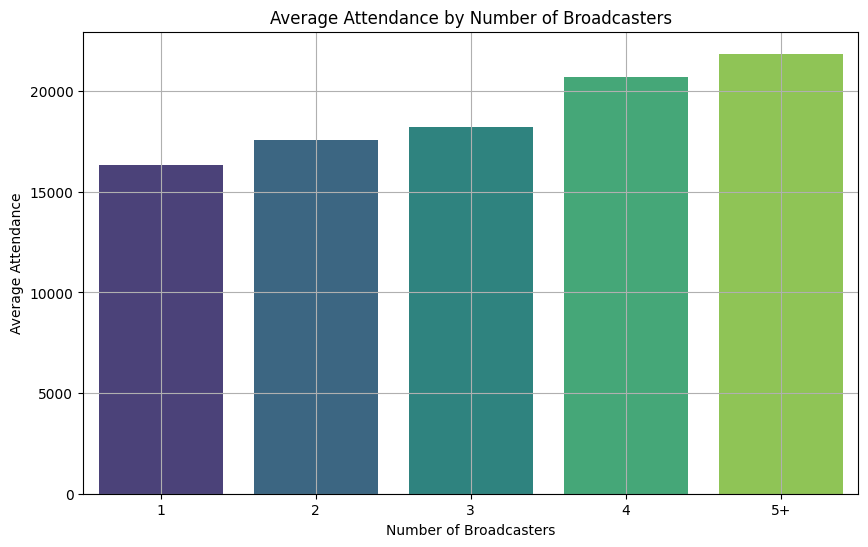

In [175]:

plt.figure(figsize=(10, 6))

# 绘制条形图
sns.barplot(x='num_broadcasters', y='attendance', data=num_broadcasters_attendance_mean, palette='viridis')

# 设置标题和轴标签
plt.title('Average Attendance by Number of Broadcasters')
plt.xlabel('Number of Broadcasters')
plt.ylabel('Average Attendance')

# 显示图形
plt.grid(True)
plt.show()


这证明转播方越多，受关注程度也越多。果然，attendance是越多的。

In [176]:
# 去掉broadcasters列
filtered_data.drop(columns=['broadcasters'], inplace=True)

C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3398862886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['broadcasters'], inplace=True)


In [177]:
filtered_data.to_csv('filtered_data.csv', index=False)
filtered_data

,id,home_team,away_team,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters
0,9190,G大阪,浦和,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2
1,9191,甲府,清水,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3
2,9192,FC東京,大分,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3
3,9193,磐田,福岡,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1
4,9194,名古屋,C大阪,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,川崎Ｆ,大宮,11.7,40,25904,2017-12-02 14:03:00,34,26232,6,1,0,2
3668,19377,甲府,仙台,18.3,34,14680,2017-12-02 14:03:00,34,17000,45,1,0,1
3669,19378,新潟,Ｃ大阪,6.7,60,19684,2017-12-02 14:04:00,34,41684,55,1,0,1
3670,19379,磐田,鹿島,17.7,30,14696,2017-12-02 14:03:00,34,15165,17,1,0,2


In [185]:
# 定义函数来清理队伍名称
def clean_team_name(name):
    # 去除空格
    name = name.replace(' ', '')
    # 将全角字符转换为半角字符
    name = ''.join([chr(ord(char) - 0xFEE0) if 0xFF01 <= ord(char) <= 0xFF5E else char for char in name])
    return name

# 应用清理函数到 home_team 和 away_team 列
filtered_data['home_team'] = filtered_data['home_team'].apply(clean_team_name)
filtered_data['away_team'] = filtered_data['away_team'].apply(clean_team_name)

C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3973503941.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['home_team'] = filtered_data['home_team'].apply(clean_team_name)
C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3973503941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['away_team'] = filtered_data['away_team'].apply(clean_team_name)


In [186]:
filtered_data

,id,home_team,away_team,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters
0,9190,G大阪,浦和,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2
1,9191,甲府,清水,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3
2,9192,FC東京,大分,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3
3,9193,磐田,福岡,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1
4,9194,名古屋,C大阪,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,川崎F,大宮,11.7,40,25904,2017-12-02 14:03:00,34,26232,6,1,0,2
3668,19377,甲府,仙台,18.3,34,14680,2017-12-02 14:03:00,34,17000,45,1,0,1
3669,19378,新潟,C大阪,6.7,60,19684,2017-12-02 14:04:00,34,41684,55,1,0,1
3670,19379,磐田,鹿島,17.7,30,14696,2017-12-02 14:03:00,34,15165,17,1,0,2


In [187]:
# 组合 home_team 和 away_team 列，并计算 unique 值
unique_combinations = filtered_data[['home_team', 'away_team']].drop_duplicates()

# 计算 unique 组合的数量
num_unique_combinations = unique_combinations.shape[0]

print(f"Number of unique home_team and away_team combinations: {num_unique_combinations}")


Number of unique home_team and away_team combinations: 720


In [188]:
# 计算每个 home_team 和 away_team 组合的 attendance 平均值
team_combinations = filtered_data.groupby(['home_team', 'away_team'])['attendance'].mean().reset_index()

# 找到 attendance 最高的组合
max_attendance_combination = team_combinations.loc[team_combinations['attendance'].idxmax()]

print(f"The combination with the highest average attendance is: Home Team: {max_attendance_combination['home_team']}, Away Team: {max_attendance_combination['away_team']}, Average Attendance: {max_attendance_combination['attendance']}")

# 打印出该组合所在的所有行
max_attendance_rows = filtered_data[(filtered_data['home_team'] == max_attendance_combination['home_team']) & 
                                    (filtered_data['away_team'] == max_attendance_combination['away_team'])]

max_attendance_rows


The combination with the highest average attendance is: Home Team: 浦和, Away Team: 横浜FC, Average Attendance: 57188.0


,id,home_team,away_team,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters
311,9990,浦和,横浜FC,15.2,64,57188,2007-03-03 16:03:00,1,62010,5,1,5,4


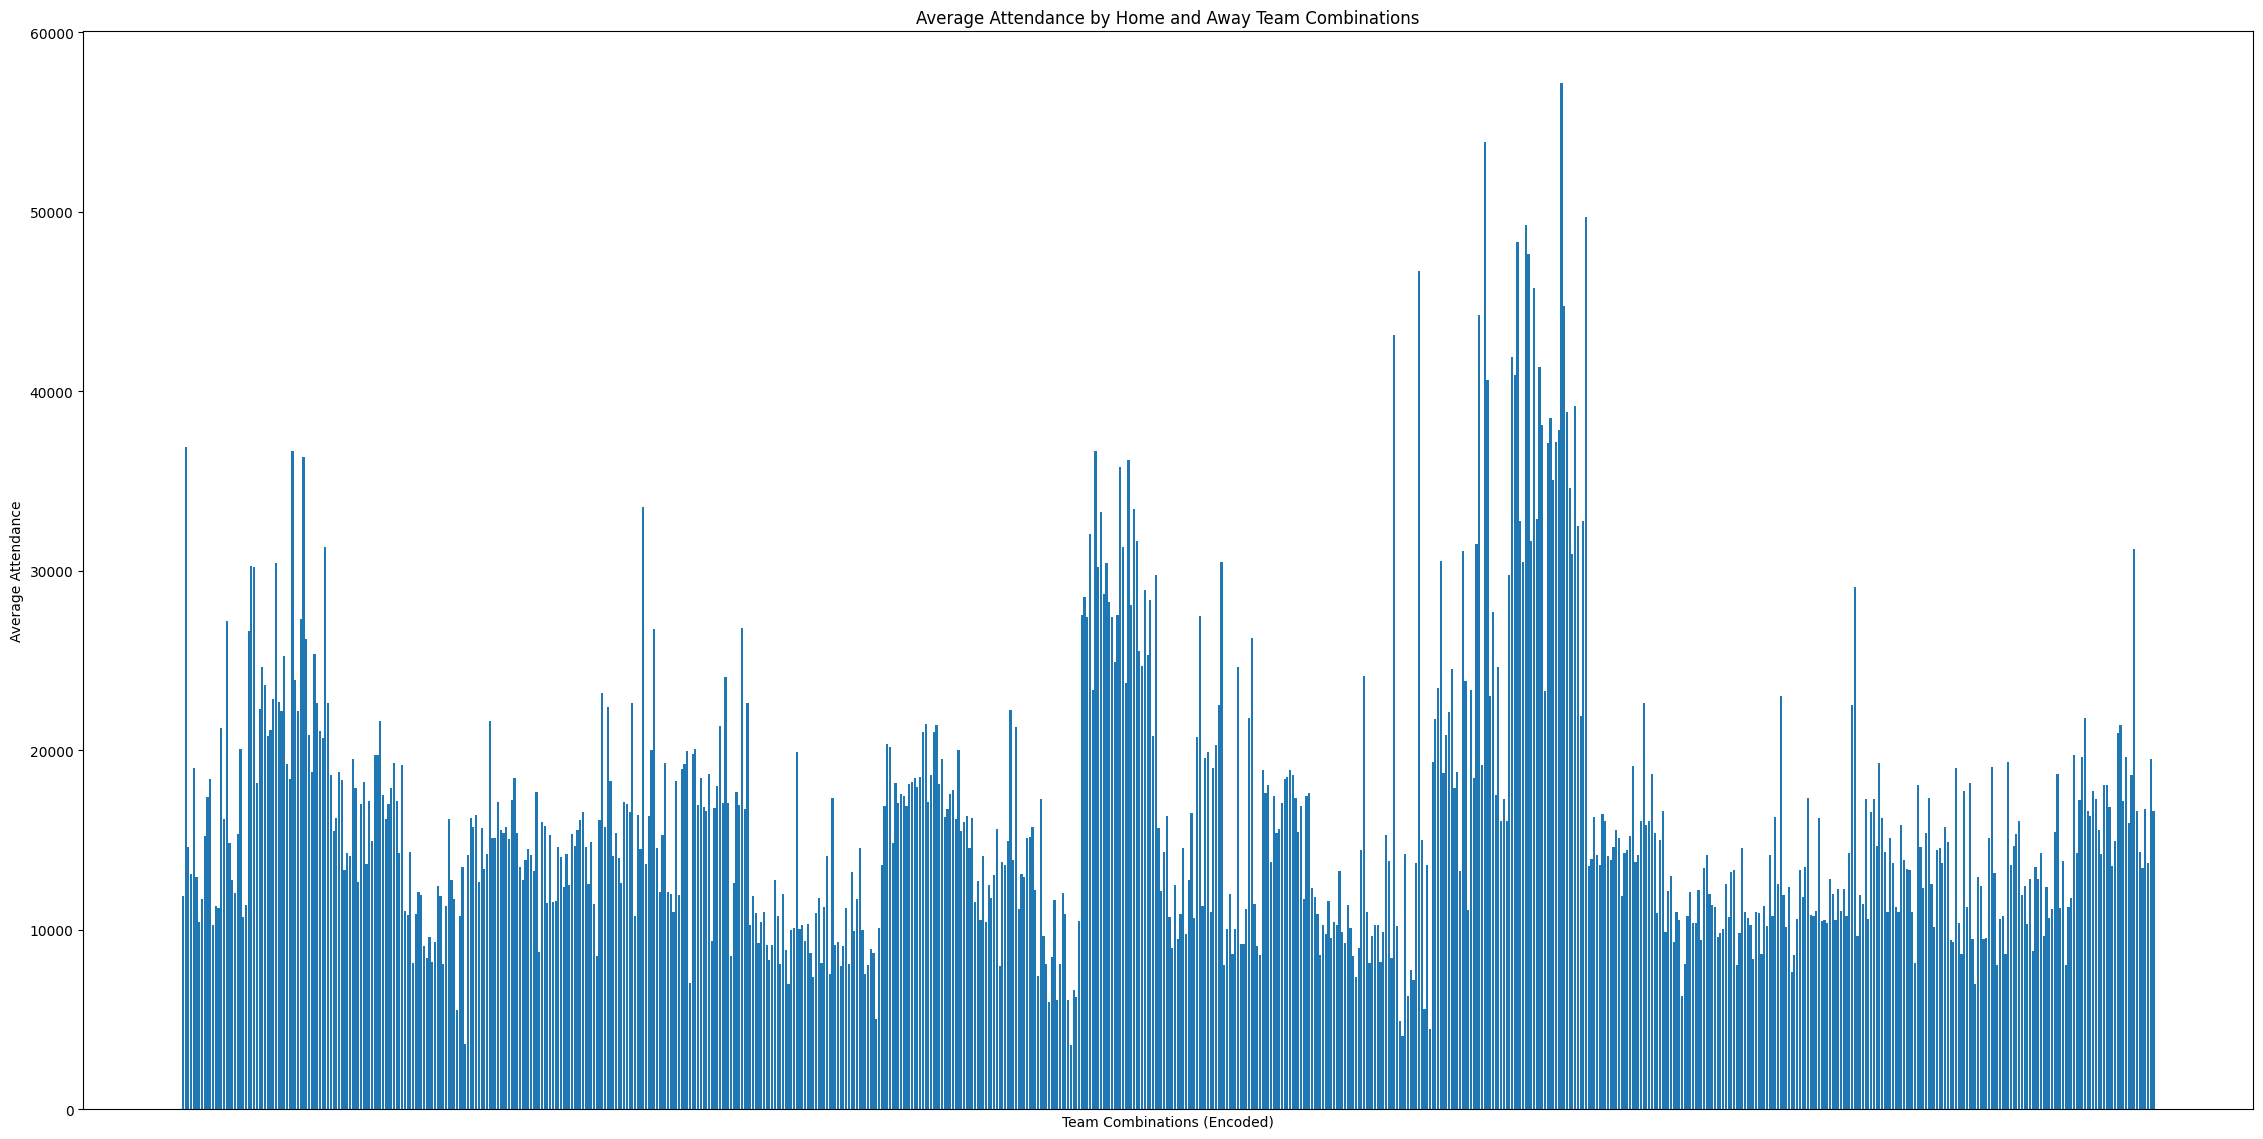

In [189]:
import matplotlib.pyplot as plt

# 计算每个 home_team 和 away_team 组合的 attendance 平均值
team_combinations = filtered_data.groupby(['home_team', 'away_team'])['attendance'].mean().reset_index()

# 为了可视化效果，给组合创建一个编号
team_combinations['combination_id'] = range(len(team_combinations))

# 设置图形大小
plt.figure(figsize=(28, 14))

# 绘制条形图
plt.bar(team_combinations['combination_id'], team_combinations['attendance'])

# 设置标题和轴标签
plt.title('Average Attendance by Home and Away Team Combinations')
plt.xlabel('Team Combinations (Encoded)')
plt.ylabel('Average Attendance')

# 隐藏x轴的具体标签，因为组合太多
plt.xticks([])

# 显示图形
plt.show()


In [190]:
# 统计 home_team 和 away_team 列的 unique 值
unique_home_teams = filtered_data['home_team'].unique()
unique_away_teams = filtered_data['away_team'].unique()

# 打印 unique 值的数量
print(f"Number of unique home teams: {len(unique_home_teams)}")
print(f"Number of unique away teams: {len(unique_away_teams)}")

# 打印 unique 值
print("Unique home teams:", unique_home_teams)
print("Unique away teams:", unique_away_teams)


Number of unique home teams: 29
Number of unique away teams: 29
Unique home teams: ['G大阪' '甲府' 'FC東京' '磐田' '名古屋' '大宮' '川崎F' '広島' '横浜FM' '浦和' '千葉' '新潟' '清水'
 '鹿島' '京都' '福岡' '大分' 'C大阪' '柏' '横浜FC' '神戸' '札幌' '東京V' '山形' '湘南' '仙台' '鳥栖'
 '徳島' '松本']
Unique away teams: ['浦和' '清水' '大分' '福岡' 'C大阪' '千葉' '新潟' '鹿島' '京都' '磐田' '甲府' 'FC東京' '名古屋'
 '横浜FM' '川崎F' '大宮' '広島' 'G大阪' '神戸' '横浜FC' '柏' '札幌' '東京V' '山形' '仙台' '湘南'
 '鳥栖' '徳島' '松本']


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3794589803.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='home_team', y='attendance', data=home_team_attendance_mean, palette='viridis')


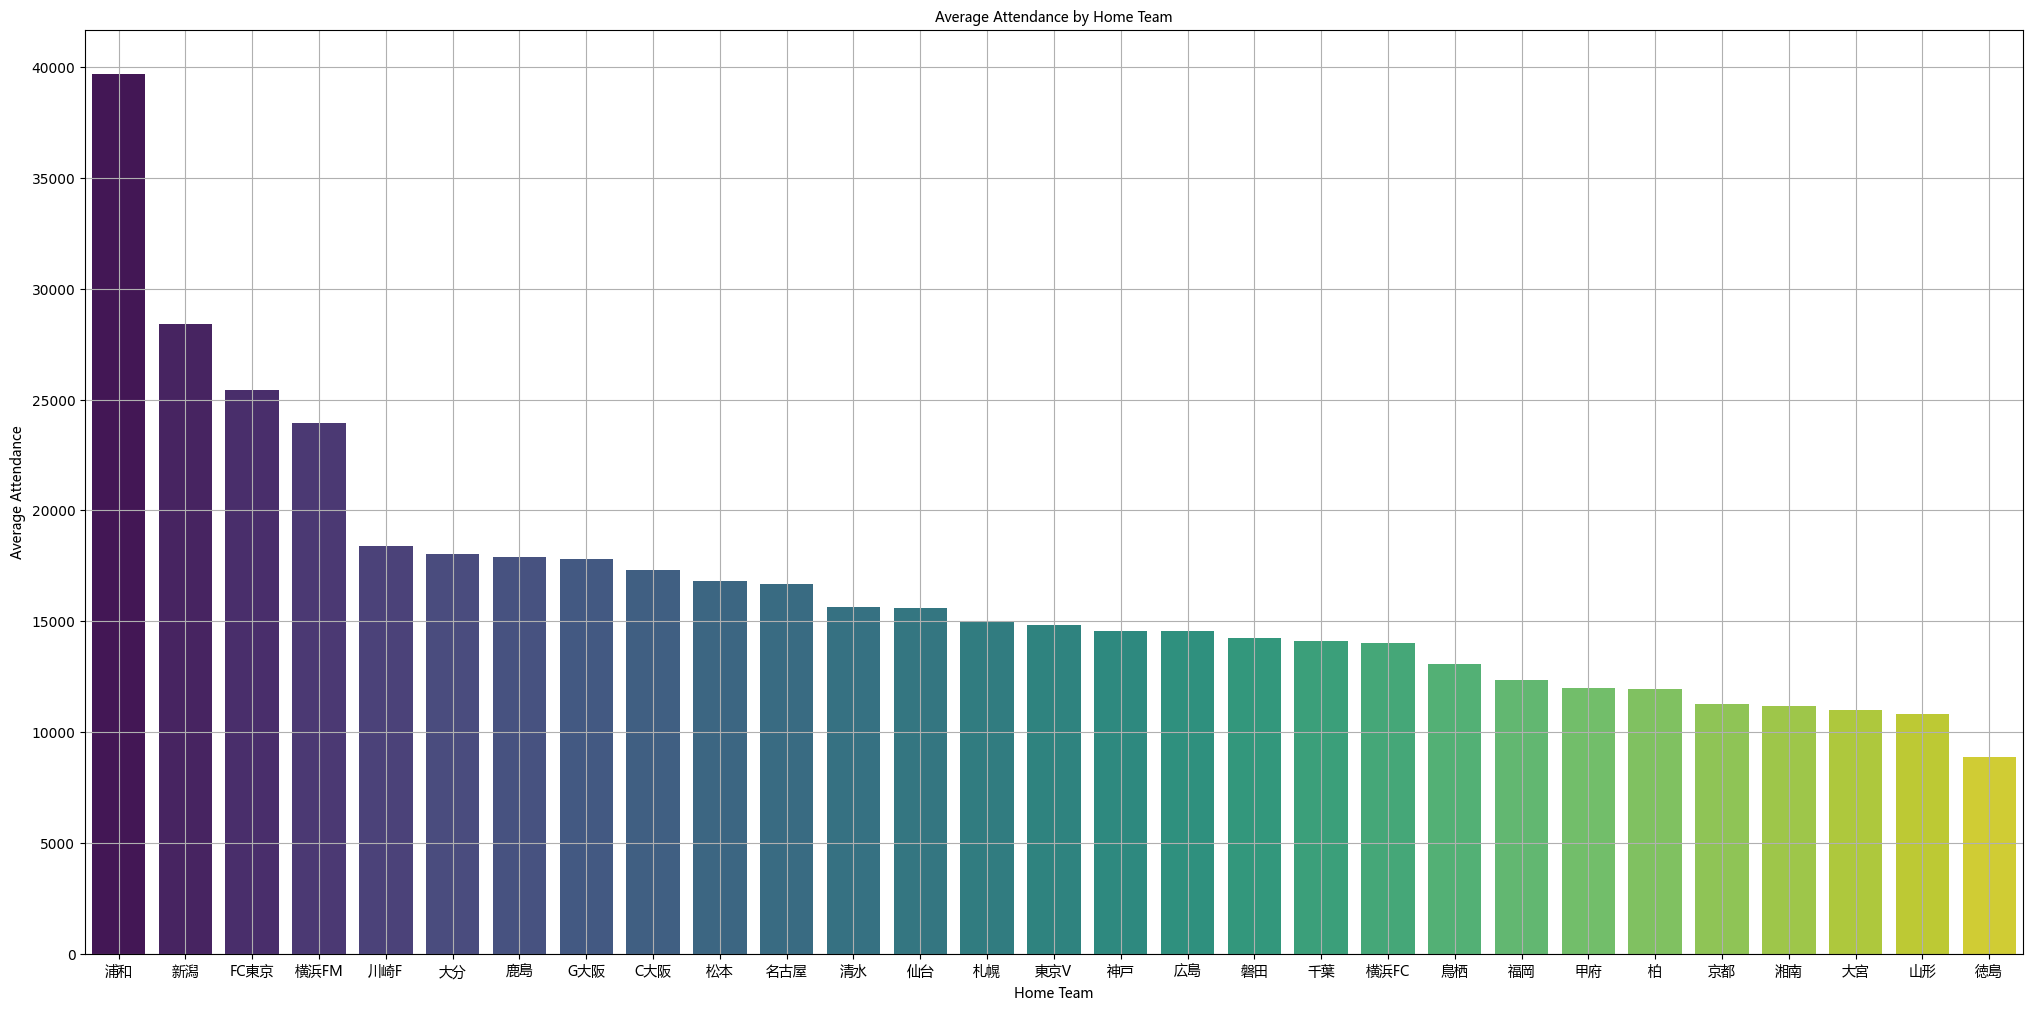

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 设置中文字体，以显示日文字符
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 使用微软雅黑字体
prop = fm.FontProperties(fname=font_path)

# 计算每个 home_team 的 attendance 平均值
home_team_attendance_mean = filtered_data.groupby('home_team')['attendance'].mean().reset_index()

# 按 attendance 平均值排序
home_team_attendance_mean = home_team_attendance_mean.sort_values(by='attendance', ascending=False)

# 设置图形大小
plt.figure(figsize=(25, 12))

# 绘制条形图
sns.barplot(x='home_team', y='attendance', data=home_team_attendance_mean, palette='viridis')

# 设置标题和轴标签，并应用字体属性
plt.title('Average Attendance by Home Team', fontproperties=prop)
plt.xlabel('Home Team', fontproperties=prop)
plt.ylabel('Average Attendance', fontproperties=prop)

# 旋转x轴标签以便更好地显示，并应用字体属性
plt.xticks(rotation=0, fontproperties=prop)

# 显示图形
plt.grid(True)
plt.show()


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\2235388671.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='away_team', y='attendance', data=away_team_attendance_mean, palette='viridis')


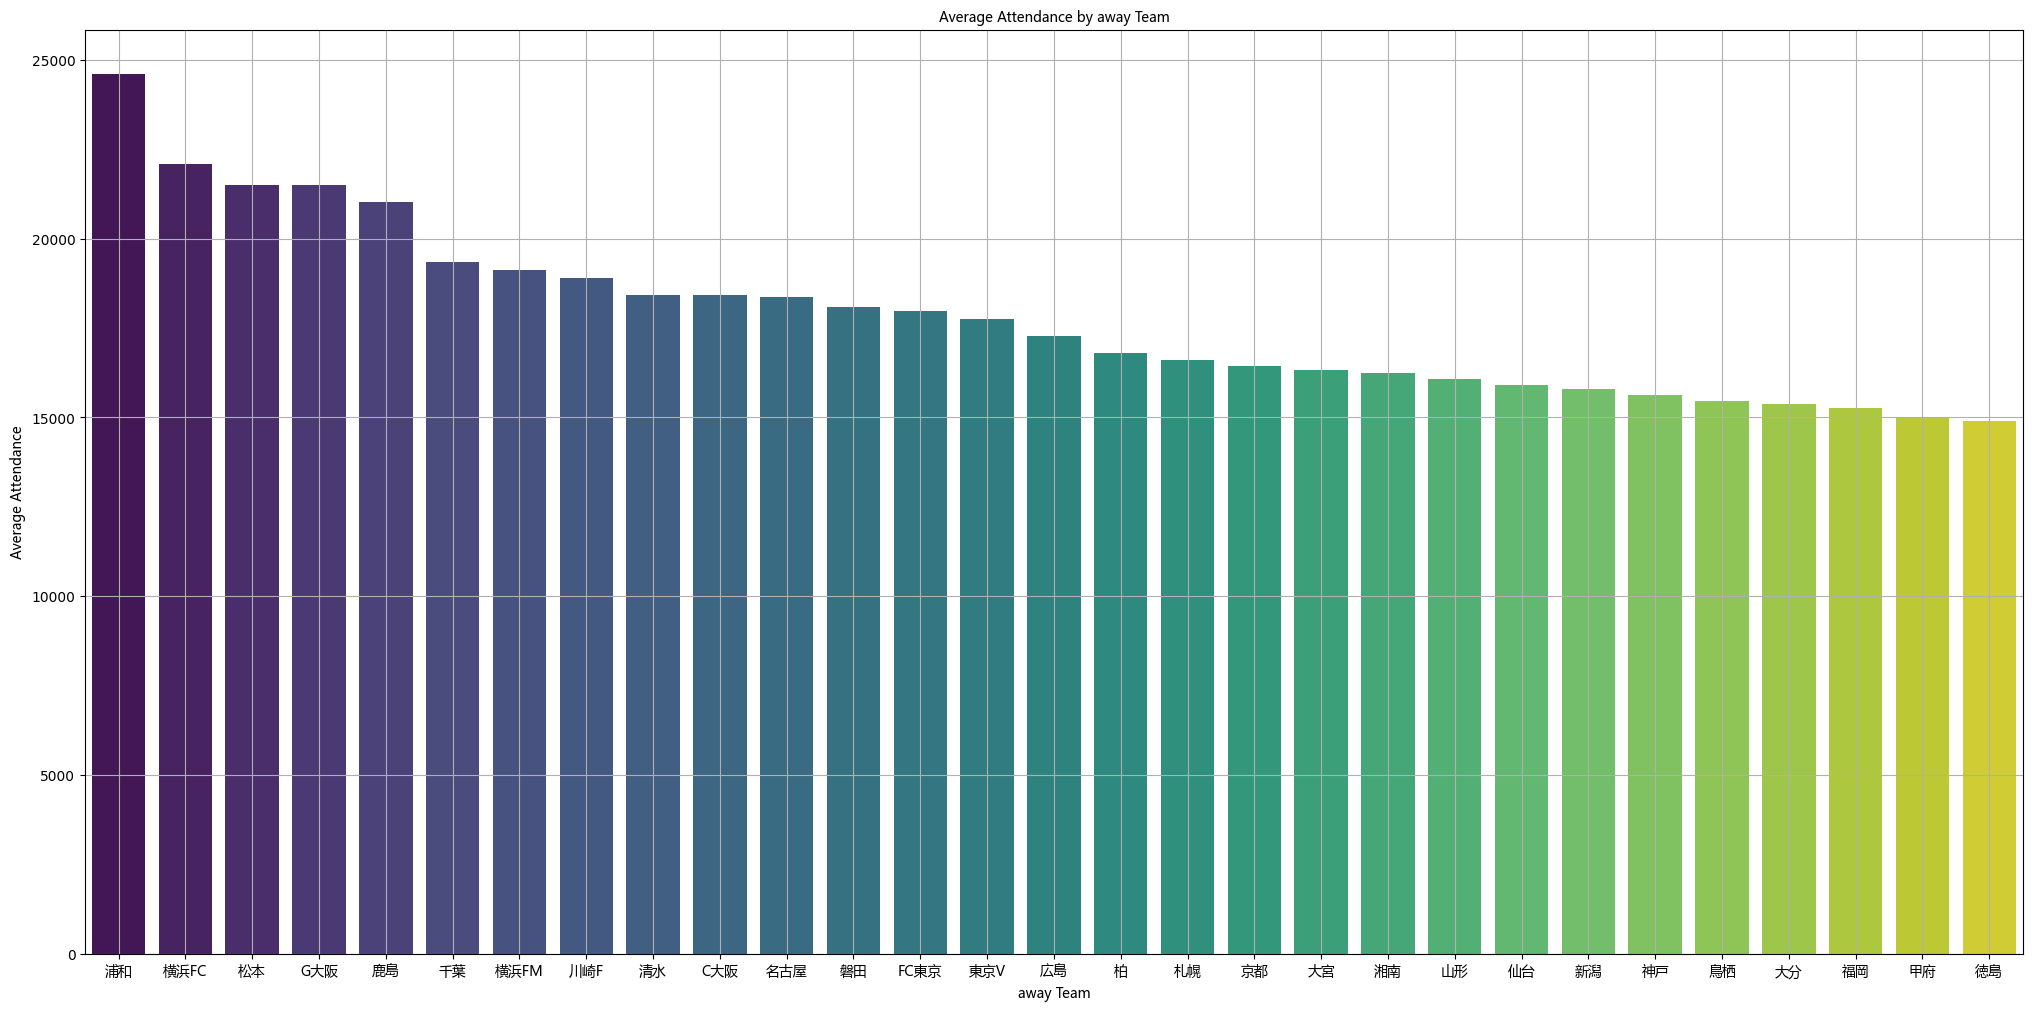

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 设置中文字体，以显示日文字符
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 使用微软雅黑字体
prop = fm.FontProperties(fname=font_path)

# 计算每个 away_team 的 attendance 平均值
away_team_attendance_mean = filtered_data.groupby('away_team')['attendance'].mean().reset_index()

# 按 attendance 平均值排序
away_team_attendance_mean = away_team_attendance_mean.sort_values(by='attendance', ascending=False)

# 设置图形大小
plt.figure(figsize=(25, 12))

# 绘制条形图
sns.barplot(x='away_team', y='attendance', data=away_team_attendance_mean, palette='viridis')

# 设置标题和轴标签，并应用字体属性
plt.title('Average Attendance by away Team', fontproperties=prop)
plt.xlabel('away Team', fontproperties=prop)
plt.ylabel('Average Attendance', fontproperties=prop)

# 旋转x轴标签以便更好地显示，并应用字体属性
plt.xticks(rotation=0, fontproperties=prop)

# 显示图形
plt.grid(True)
plt.show()


In [193]:
filtered_data

,id,home_team,away_team,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters
0,9190,G大阪,浦和,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2
1,9191,甲府,清水,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3
2,9192,FC東京,大分,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3
3,9193,磐田,福岡,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1
4,9194,名古屋,C大阪,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,川崎F,大宮,11.7,40,25904,2017-12-02 14:03:00,34,26232,6,1,0,2
3668,19377,甲府,仙台,18.3,34,14680,2017-12-02 14:03:00,34,17000,45,1,0,1
3669,19378,新潟,C大阪,6.7,60,19684,2017-12-02 14:04:00,34,41684,55,1,0,1
3670,19379,磐田,鹿島,17.7,30,14696,2017-12-02 14:03:00,34,15165,17,1,0,2


In [194]:
# 获取 home_team 和 away_team 的 unique 值
unique_teams = pd.concat([filtered_data['home_team'], filtered_data['away_team']]).unique()

# 创建编码字典
team_dict = {team: i for i, team in enumerate(unique_teams)}

# 使用字典对 home_team 和 away_team 进行编码
filtered_data['home_team_encoded'] = filtered_data['home_team'].map(team_dict)
filtered_data['away_team_encoded'] = filtered_data['away_team'].map(team_dict)

# 显示前几行以确认结果
print(filtered_data[['home_team', 'home_team_encoded', 'away_team', 'away_team_encoded']].head())

  home_team  home_team_encoded away_team  away_team_encoded
0       G大阪                  0        浦和                  9
1        甲府                  1        清水                 12
2      FC東京                  2        大分                 16
3        磐田                  3        福岡                 15
4       名古屋                  4       C大阪                 17


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\287817387.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['home_team_encoded'] = filtered_data['home_team'].map(team_dict)
C:\Users\29724\AppData\Local\Temp\ipykernel_20220\287817387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['away_team_encoded'] = filtered_data['away_team'].map(team_dict)


In [195]:
filtered_data

,id,home_team,away_team,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters,home_team_encoded,away_team_encoded
0,9190,G大阪,浦和,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2,0,9
1,9191,甲府,清水,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3,1,12
2,9192,FC東京,大分,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3,2,16
3,9193,磐田,福岡,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1,3,15
4,9194,名古屋,C大阪,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,川崎F,大宮,11.7,40,25904,2017-12-02 14:03:00,34,26232,6,1,0,2,6,5
3668,19377,甲府,仙台,18.3,34,14680,2017-12-02 14:03:00,34,17000,45,1,0,1,1,25
3669,19378,新潟,C大阪,6.7,60,19684,2017-12-02 14:04:00,34,41684,55,1,0,1,11,17
3670,19379,磐田,鹿島,17.7,30,14696,2017-12-02 14:03:00,34,15165,17,1,0,2,3,13


In [198]:
# 删除 home_team 和 away_team 列
filtered_data.drop(columns=['home_team', 'away_team'], inplace=True)


KeyError: "['home_team', 'away_team'] not found in axis"

In [199]:

# 保存修改后的数据到新的 CSV 文件
filtered_data.to_csv('filtered_data_v1.csv', index=False)

# 显示前几行以确认结果
filtered_data.head()


,id,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters,home_team_encoded,away_team_encoded
0,9190,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2,0,9
1,9191,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3,1,12
2,9192,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3,2,16
3,9193,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1,3,15
4,9194,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4,4,17


In [197]:
# 读取 holidays_in_japan.csv 文件
holidays_info_path = 'holidays_in_japan.csv'
holidays_info = pd.read_csv(holidays_info_path)

# 显示前几行以查看节假日信息
holidays_info.head()


,holiday_date,description
0,2006-01-01,元日
1,2006-01-02,元日 振替休日
2,2006-01-09,成人の日
3,2006-02-11,建国記念の日
4,2006-03-21,春分の日


In [202]:
filtered_data = pd.read_csv('filtered_data_v1.csv')

# 确保 holiday_date 列是 datetime 类型
holidays_info['holiday_date'] = pd.to_datetime(holidays_info['holiday_date'])

# 确保 match_datetime 列是 datetime 类型
filtered_data['match_datetime'] = pd.to_datetime(filtered_data['match_datetime'])

# 提取 match_datetime 的日期部分
filtered_data['match_date'] = filtered_data['match_datetime'].dt.date

# 为节假日创建一个 set 以便快速查找
holidays_set = set(holidays_info['holiday_date'].dt.date)

# 添加 special_holiday 列，根据 match_date 判断是否为节假日
filtered_data['special_holiday'] = filtered_data['match_date'].apply(lambda x: 1 if x in holidays_set else 0)

# 删除临时的 match_date 列
filtered_data.drop(columns=['match_date'], inplace=True)


# 显示前几行以确认结果
filtered_data.head(50)


,id,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters,home_team_encoded,away_team_encoded,special_holiday
0,9190,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2,0,9,0
1,9191,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3,1,12,0
2,9192,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3,2,16,0
3,9193,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1,3,15,0
4,9194,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4,4,17,0
5,9195,12.6,33,13085,2006-03-05 15:03:00,1,62010,5,2,0,3,5,10,0
6,9196,13.3,34,17444,2006-03-05 15:00:00,1,26232,6,2,0,1,6,11,0
7,9197,12.4,58,17564,2006-03-05 15:06:00,1,36894,7,2,1,2,7,13,0
8,9198,12.6,34,23607,2006-03-05 15:35:00,1,71624,8,2,0,3,8,14,0
9,9199,16.0,48,56512,2006-03-11 14:04:00,2,62010,5,1,0,4,9,3,0


In [204]:
import pandas as pd

# 确保 match_datetime 列是 datetime 类型
filtered_data['match_datetime'] = pd.to_datetime(filtered_data['match_datetime'])

# 提取 match_datetime 的星期几信息（0=周一, 1=周二, ..., 5=周六, 6=周日）
filtered_data['day_of_week'] = filtered_data['match_datetime'].dt.dayofweek

# 添加 weekend 列，判断是否为周六（5）或周日（6）
filtered_data['weekend'] = filtered_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 删除临时的 day_of_week 列
filtered_data.drop(columns=['day_of_week'], inplace=True)

# 显示前几行以确认结果
filtered_data.head(50)


,id,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters,home_team_encoded,away_team_encoded,special_holiday,weekend
0,9190,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2,0,9,0,1
1,9191,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3,1,12,0,1
2,9192,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3,2,16,0,1
3,9193,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1,3,15,0,1
4,9194,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4,4,17,0,1
5,9195,12.6,33,13085,2006-03-05 15:03:00,1,62010,5,2,0,3,5,10,0,1
6,9196,13.3,34,17444,2006-03-05 15:00:00,1,26232,6,2,0,1,6,11,0,1
7,9197,12.4,58,17564,2006-03-05 15:06:00,1,36894,7,2,1,2,7,13,0,1
8,9198,12.6,34,23607,2006-03-05 15:35:00,1,71624,8,2,0,3,8,14,0,1
9,9199,16.0,48,56512,2006-03-11 14:04:00,2,62010,5,1,0,4,9,3,0,1


In [ ]:
# 统计工作日和节假日中举行的比赛场次
holiday_counts = filtered_data['special_holiday'].value_counts().reset_index()
holiday_counts.columns = ['special_holiday', 'count']

# 显示统计结果
print(holiday_counts)

# 可视化工作日和节假日中举行的比赛场次
plt.figure(figsize=(8, 6))
sns.barplot(x='special_holiday', y='count', data=holiday_counts, palette='viridis')
plt.title('Number of Matches Held on Holidays vs. Working Days', fontproperties=prop)
plt.xlabel('Special Holiday (0 = Working Day, 1 = Holiday)', fontproperties=prop)
plt.ylabel('Number of Matches', fontproperties=prop)
plt.xticks(ticks=[0, 1], labels=['Working Day', 'Holiday'], fontproperties=prop)
plt.grid(True)
plt.show()

   is_holiday  count     type
0           1   3287  Holiday
1           0    339  Weekday


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\1984796552.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='count', data=match_counts, palette='viridis')


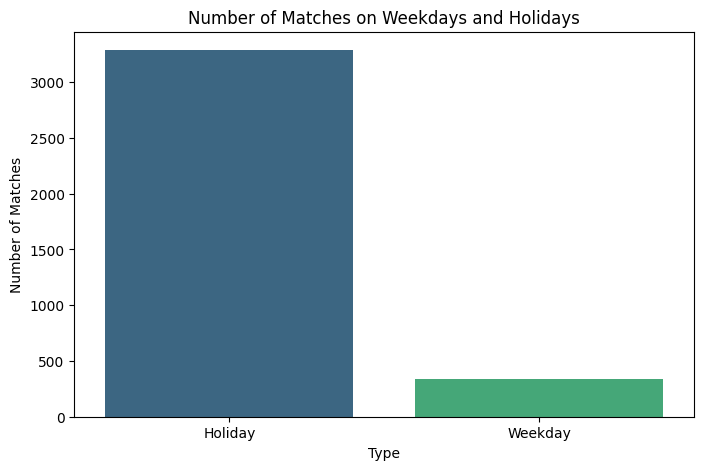

In [205]:
# 计算工作日和节假日（special_holiday 或 weekend）中举行的比赛数量
filtered_data['is_holiday'] = filtered_data.apply(lambda row: 1 if row['special_holiday'] == 1 or row['weekend'] == 1 else 0, axis=1)

# 计算各自的比赛数量
match_counts = filtered_data['is_holiday'].value_counts().reset_index()
match_counts.columns = ['is_holiday', 'count']
match_counts['type'] = match_counts['is_holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Weekday')

# 打印结果
print(match_counts)

# 可视化
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='count', data=match_counts, palette='viridis')

# 设置标题和轴标签
plt.title('Number of Matches on Weekdays and Holidays')
plt.xlabel('Type')
plt.ylabel('Number of Matches')

# 显示图形
plt.show()

                       holiday_type  count
0   Weekend and Not Special Holiday   3005
1                           Weekday    339
2   Special Holiday and Not Weekend    206
3  Both Special Holiday and Weekend     76


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\3888987309.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_type', y='count', data=match_counts, palette='viridis')


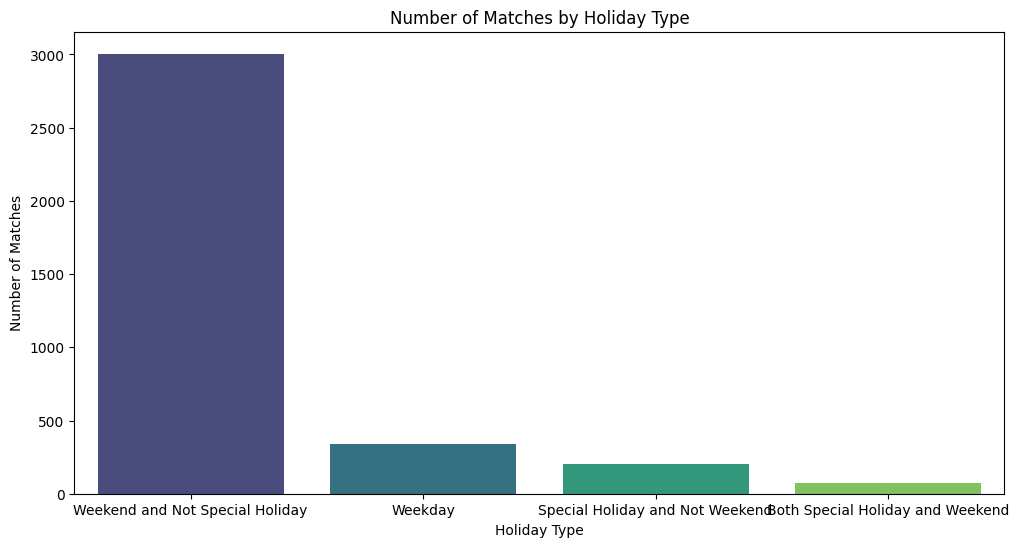

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 计算不同情况下的比赛数量
filtered_data['holiday_type'] = filtered_data.apply(
    lambda row: 'Both Special Holiday and Weekend' if row['special_holiday'] == 1 and row['weekend'] == 1 else
                'Special Holiday and Not Weekend' if row['special_holiday'] == 1 and row['weekend'] == 0 else
                'Weekend and Not Special Holiday' if row['special_holiday'] == 0 and row['weekend'] == 1 else
                'Weekday',
    axis=1
)

# 统计各自的比赛数量
match_counts = filtered_data['holiday_type'].value_counts().reset_index()
match_counts.columns = ['holiday_type', 'count']

# 打印结果
print(match_counts)

# 可视化
plt.figure(figsize=(12, 6))
sns.barplot(x='holiday_type', y='count', data=match_counts, palette='viridis')

# 设置标题和轴标签
plt.title('Number of Matches by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Number of Matches')

# 旋转x轴标签以便更好地显示
plt.xticks(rotation=0)

# 显示图形
plt.show()

filtered_data.drop(columns=['is_holiday'], inplace=True)

In [215]:
filtered_data

,id,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters,home_team_encoded,away_team_encoded,special_holiday,weekend,holiday_type
0,9190,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2,0,9,0,1,Weekend and Not Special Holiday
1,9191,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3,1,12,0,1,Weekend and Not Special Holiday
2,9192,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3,2,16,0,1,Weekend and Not Special Holiday
3,9193,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1,3,15,0,1,Weekend and Not Special Holiday
4,9194,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4,4,17,0,1,Weekend and Not Special Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,19376,11.7,40,25904,2017-12-02 14:03:00,34,26232,6,1,0,2,6,5,0,1,Weekend and Not Special Holiday
3622,19377,18.3,34,14680,2017-12-02 14:03:00,34,17000,45,1,0,1,1,25,0,1,Weekend and Not Special Holiday
3623,19378,6.7,60,19684,2017-12-02 14:04:00,34,41684,55,1,0,1,11,17,0,1,Weekend and Not Special Holiday
3624,19379,17.7,30,14696,2017-12-02 14:03:00,34,15165,17,1,0,2,3,13,0,1,Weekend and Not Special Holiday


                       holiday_type    attendance
0  Both Special Holiday and Weekend  20875.500000
1   Special Holiday and Not Weekend  20198.407767
2                           Weekday  13362.471976
3   Weekend and Not Special Holiday  18344.968719


C:\Users\29724\AppData\Local\Temp\ipykernel_20220\2524921394.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_type', y='attendance', data=attendance_means, palette='viridis')


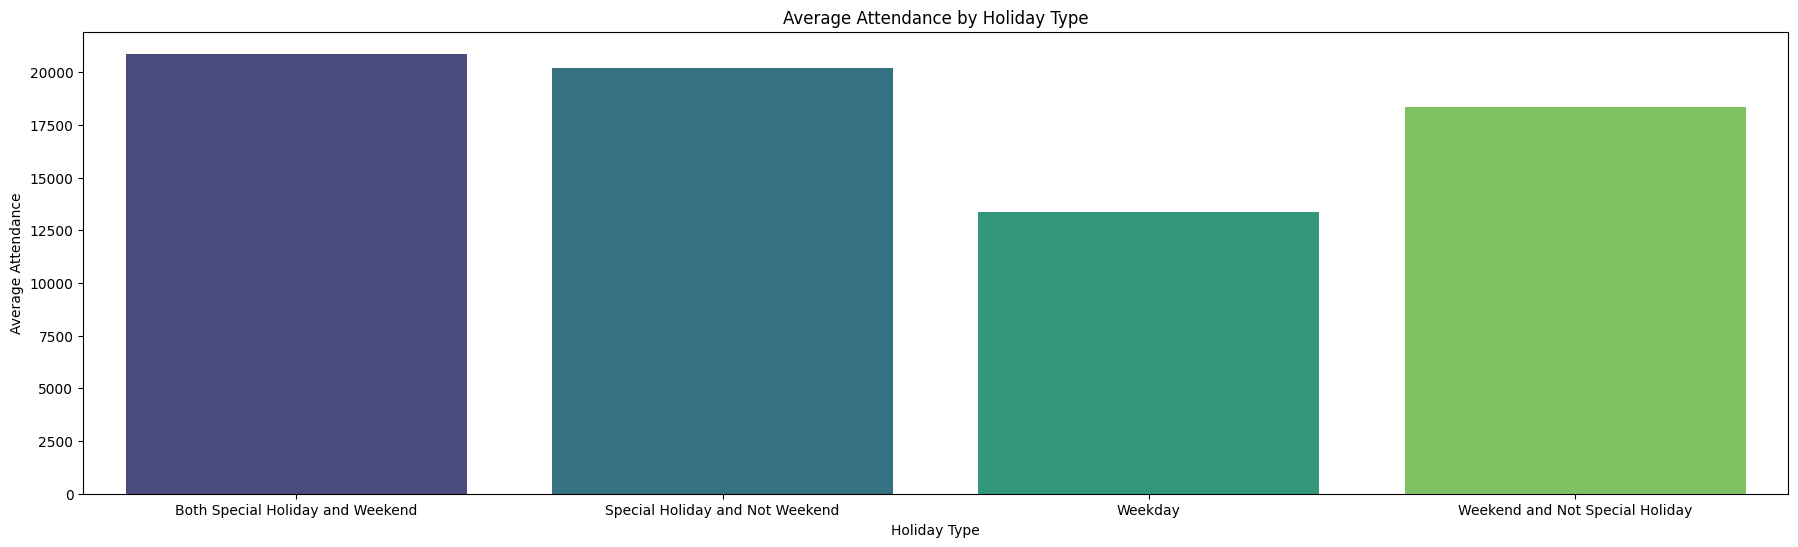

In [217]:
# 计算每种比赛类型的平均观众人数
attendance_means = filtered_data.groupby('holiday_type')['attendance'].mean().reset_index()

# 打印结果
print(attendance_means)

# 可视化
plt.figure(figsize=(22, 6))
sns.barplot(x='holiday_type', y='attendance', data=attendance_means, palette='viridis')

# 设置标题和轴标签
plt.title('Average Attendance by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Attendance')

# 旋转x轴标签以便更好地显示
plt.xticks(rotation=0)

# 显示图形
plt.show()

节假日和工作日确实有影响，不过我们不需要holiday_type了，special_day和weekend相当于独热编码，已经包含了holiday_type的信息。

In [219]:
filtered_data.drop(columns=['holiday_type'], inplace=True)

# # 将num_broadcasters列转换为int64类型
# filtered_data['num_broadcasters'] = filtered_data['num_broadcasters'].astype(int)

filtered_data.to_csv('filtered_data_final.csv', index=False)

filtered_data

,id,temperature,humidity,attendance,match_datetime,section_encoded,venue_capacity,venue_encoded,round_encoded,weather_encoded,num_broadcasters,home_team_encoded,away_team_encoded,special_holiday,weekend
0,9190,8.3,40,20916,2006-03-04 16:04:00,1,21000,0,1,0,2,0,9,0,1
1,9191,12.9,28,14277,2006-03-05 13:00:00,1,15859,1,2,0,3,1,12,0,1
2,9192,12.1,35,22531,2006-03-05 13:35:00,1,47851,2,2,0,3,2,16,0,1
3,9193,11.6,42,28564,2006-03-05 14:04:00,1,51697,3,2,0,1,3,15,0,1
4,9194,13.1,32,17199,2006-03-05 14:04:00,1,20223,4,2,0,4,4,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,19376,11.7,40,25904,2017-12-02 14:03:00,34,26232,6,1,0,2,6,5,0,1
3622,19377,18.3,34,14680,2017-12-02 14:03:00,34,17000,45,1,0,1,1,25,0,1
3623,19378,6.7,60,19684,2017-12-02 14:04:00,34,41684,55,1,0,1,11,17,0,1
3624,19379,17.7,30,14696,2017-12-02 14:03:00,34,15165,17,1,0,2,3,13,0,1
